In [1]:
#Librairies que nous allons utiliser
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import cma
import cma.purecma as purecma

Using TensorFlow backend.


In [ ]:
"""
Ici, nous avons crée des données jouets qui servirons d'entrainement pour apprendre les différentes façons
d'entrainer un modèle a réduire une fitness.
Donc notre fitnesse c'est 
"""
#Creations de données jouées 
x = np.linspace(-20,20,30).reshape((-1,1))
y = 5 * x + 3 + np.random.normal(0,5,x.shape)
y = y.reshape((-1,1))
plt.scatter(x,y)

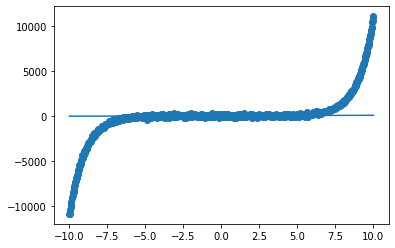

In [6]:
#Tracage d'une droite dans un le nuage de point
"""
Supposons que l'on ait trouvé un modèle w = a,b tel que la prédiction serrait égale y = ax + b.
Pour le tester on pourra utiliser cette fonction.
Remarque : w doit être un vecteur colonne et x un vecteur ligne pour que le produit sur les différents x
donne les prédictions du modèle.
"""

def predictions(w,x):
    ypredict = np.dot(x,w.T)
    return ypredict
    
"""
Cette fonction ajoute simple une colonne de 1 pour que chaque produit de x par un w donne x0 * a + b *1 c'est a
a dire a*x0+b.
"""
def adapt(X):
    return np.hstack((X,np.ones((X.shape[0],1))))  

#D'abord on affiche le nuage
plt.scatter(x,y)
#Ensuite on ajoute le tracé
ypred = predictions(np.array([5,2]),adapt(x)) #Donc la je test a = 5, b = 2 parce que je les connaits
plt.plot(x,ypred)
plt.show()

In [ ]:
#Résolution direct d'une regression linéaire
"""
Donc la l'objectif clairement c'est de retourver les coefficients de la droite de regression linéaire en utilisant
une résolution algébrique.
Rappel : 
    - Résoudre un systeme Xw = B reviens a trouver x c'est a dire A^-1*B (donc calculer l'inverse de A par B)
    - En Python, pour calculer l'inverse on fait : np.linalg.pinv(A) (pseudo-inversion)
"""
w = np.dot(np.linalg.pinv(adapt(x).T.dot(adapt(x))),adapt(x).T.dot(y))
print("Donc le modèle qu'on trouve est : ",w.T)
plt.scatter(x,y)
#Calcul des prédictions
ypred = predictions(w.T,adapt(x))
#Tracage du modèle : 
plt.plot(x,ypred)
plt.show()

### Résolution par descente de gradient
Le gradient d'une fonction de plusieurs paramètres correspond au vecteur des dérivées suivant les différents paramètres, il indique le sens dans lequel la fonction croit.
Par exemple : 
Soit f(x,y,z) = 3x + 8y + 3z² + 6 le gradient est 
$ \nabla $f(x,y,z) = (3,8,6z) 
et donc le gradient donne pour un point donné $\nabla$f(4,5,2) = (3,8,12).
Donc pour un coût égale a la différence entre la prédiction et la valeur réelle au carré le calcul se fait en version matricielle comme suit :

Cout des prédictions : C'est la différence entre la prédiction et la valeur qui donne un vecteur Xw - y

Donc le cout est $(Xw-y)^T * (Xw-y)$ (multiplier une ligne par une colonne sur un papier pour s'en convaincre)

Et sa dérivée est la dérivée selon w qui donne : 2X(Xw-y) et il suffit de remplacer n'importe quel w pour avoir le vecteur vers lequel ce coût augmente (et par inversion celui vers lequel le coût diminue).


In [ ]:
def cost(X,y,w):
    return np.dot(X,w)- y

def gradient(X,y,w):
    return np.dot(2*X.T,np.dot(X,w)- y)


x = np.linspace(-20,20,30).reshape((-1,1))
y = 5 * x + 3 + np.random.normal(0,5,x.shape)
y = y.reshape((-1,1))

#J'initialise les poids aléatoirement
w = np.zeros((1,2)) #1 Ligne, Deux colonnes donc un vecteur [a,b]
print(w)
#On fixe un nombre d'itérations
nb_iter = 10
x_a = adapt(x)
alpha = 1e-5
w = w.T
for i in range(10000):
    #J'affiche le coût 
    #Je met a jour les poids en suivant l'inverse du gradient
    w = w - alpha * gradient(x_a,y,w)
print("w = ",w)
w = np.dot(np.linalg.pinv(x_a.T.dot(x_a)),x_a.T.dot(y))
print("Et le modèle qu'on trouve par résolution directe est : ",w.T)

### Modéle plus compliqué
Une fois qu'on a compris une façon d'apprendre a paramétrer un modèle pour réduire un objectif (donné) il faut garder a l'esprit que le modèle linéaire est simplement un exemple de modèles.
On peut facilement l'etendre de plusieurs façons : 

In [ ]:
"""
Par exemple si on ajoute une colonne a X correspondant a x² en plus de la colonne de 1 et qu'on calcule 
un w = [a,b,c], Xw donne ax² + bx + 1 donc c'est un genre de régression quadratique.
Et ça permet d'apprendre une forme de parabole
"""
x = np.linspace(-20,20,30).reshape((-1,1))
y = 5 * x**2 + 6*x + 3 + np.random.normal(0,30,x.shape)
y = y.reshape((-1,1))
plt.scatter(x,y)

In [ ]:

def adapt_quad(X):
    return np.hstack((X**2,X,np.ones((X.shape[0],1))))  

w = np.dot(np.linalg.pinv(adapt_quad(x).T.dot(adapt_quad(x))),adapt_quad(x).T.dot(y))
print("Donc le modèle qu'on trouve est : ",w.T)
plt.scatter(x,y)
#Calcul des prédictions
ypred = predictions(w.T,adapt_quad(x))
#Tracage du modèle : 
plt.plot(x,ypred)
plt.show()

In [ ]:
x = np.linspace(-5,+5,30).reshape((-1,1))
y = np.sin(x) 
y = y.reshape((-1,1))

def adapt_quad(X):
    return np.hstack((X**2,X,np.ones((X.shape[0],1))))  

w = np.dot(np.linalg.pinv(adapt_quad(x).T.dot(adapt_quad(x))),adapt_quad(x).T.dot(y))
print("Donc le modèle qu'on trouve est : ",w.T)
plt.scatter(x,y)
#Calcul des prédictions
ypred = predictions(w.T,adapt_quad(x))
#Tracage du modèle : 
plt.plot(x,ypred)
plt.show()

In [ ]:
x = np.linspace(-5,+5,30).reshape((-1,1))
y = np.sin(x) 
y = y.reshape((-1,1))

def adapt_quad(X):
    return np.hstack((X**3,X**2,X,np.ones((X.shape[0],1))))  

w = np.dot(np.linalg.pinv(adapt_quad(x).T.dot(adapt_quad(x))),adapt_quad(x).T.dot(y))
print("Donc le modèle qu'on trouve est : ",w.T)
plt.scatter(x,y)
#Calcul des prédictions
ypred = predictions(w.T,adapt_quad(x))
#Tracage du modèle : 
plt.plot(x,ypred)
plt.show()

In [ ]:
x = np.linspace(-5,+5,30).reshape((-1,1))
y = np.sin(x) 
y = y.reshape((-1,1))

def adapt_quad(X):
    return np.hstack((X**5,X**4,X**3,X**2,X,np.ones((X.shape[0],1))))  

w = np.dot(np.linalg.pinv(adapt_quad(x).T.dot(adapt_quad(x))),adapt_quad(x).T.dot(y))
print("Donc le modèle qu'on trouve est : ",w.T)
plt.scatter(x,y)
#Calcul des prédictions
ypred = predictions(w.T,adapt_quad(x))
#Tracage du modèle : 
plt.plot(x,ypred)
plt.show()

In [ ]:
x = np.linspace(-10,+10,30).reshape((-1,1))
y = np.sin(x) 
y = y.reshape((-1,1))

def adapt_quad(X):
    return np.hstack((X**7,X**6,X**5,X**4,X**3,X**2,X,np.ones((X.shape[0],1))))  

w = np.dot(np.linalg.pinv(adapt_quad(x).T.dot(adapt_quad(x))),adapt_quad(x).T.dot(y))
print("Donc le modèle qu'on trouve est : ",w.T)
plt.scatter(x,y)
#Calcul des prédictions
ypred = predictions(w.T,adapt_quad(x))
#Tracage du modèle : 
plt.plot(x,ypred)
plt.show()

In [ ]:
x = np.linspace(-10,+10,30).reshape((-1,1))
y = np.sin(x) 
y = y.reshape((-1,1))

def adapt_quad(X):
    return np.hstack((X**13,X**12,X**11,X**10,X**9,X**8,X**7,X**6,X**5,X**4,X**3,X**2,X,np.ones((X.shape[0],1))))  

w = np.dot(np.linalg.pinv(adapt_quad(x).T.dot(adapt_quad(x))),adapt_quad(x).T.dot(y))
print("Donc le modèle qu'on trouve est : ",w.T)
plt.scatter(x,y)
#Calcul des prédictions
ypred = predictions(w.T,adapt_quad(x))
#Tracage du modèle : 
plt.plot(x,ypred)
plt.show()

Comme vous le voyez on peut apprendre mais les capacités de généralisations sont toujours trés limités, ici la solution évidente une fois qu'on constate que c'est un sinus est d'utiliser simplement la réciproque c'est a dire $sin^{-1}$ afin de repasser au cas linéaire

# Démystifier les Réseaux de Neurones

### Un Perceptron 
Enfaite un perceptron c'est juste une regression linéaire qui en sortie passe par une fonction d'activation,
En l'occurrent si la fonction d'activation est la fonction identité, c'est exactement une regression linéaire.
Ce qu'il faut comprendre c'est que chaque neurone dispose d'une matrice de pondérations pour les synapses en entrée 
![40% center](nn1.png)

Avant de commencer a expérimenter, on importe un dataset, on en profite également pour importer une fonction de
coûts implémentée par Scikit-Learn qui calcule les moindres carrés , ~~la flemme de la coder~~ les détails de son
implémentation sont laissés en exercice au lecteur

In [ ]:

X, y = load_boston(return_X_y=True)
print(X.shape)
print(y.shape)

In [ ]:
"""
Donc pour rappel un réseau de neurones se compose de : 
    - Une matrice de poids pour les synapses en entrée 
    - Une matrice de biais
    - Une fonction d'activation qui détermine la sortie en fonction d'une combinaison linéaire de l'entrée.
Calculer la sortie d'un neurone (ou d'un réseau de neurones) se fait en utilisant l'algorithme de feed forward. 
"""

weights = np.zeros((13,1)) #On met les weights a zéro par exemple.
biais = np.zeros(1)

sigm = lambda x:1/(1 + np.exp(-x))
identity = lambda x:x

def feed_forward(x,*neurone):
    w,biais,activation_func = neurone
    y = np.dot(x,w) + biais
    y = activation_func(y)
    return y

In [ ]:
"""
Imaginons que la par exemple on entraine nos pondérations par résolution directe des moindres carrés
"""
weights = np.dot(np.linalg.pinv(adapt(X).T.dot(adapt(X))),adapt(X).T.dot(y))
print("Weights = ",weights)
"""
A ce moment la la prédiction vas normalement être plus précise
Remarque : si vous comptez vous remarquerez qu'il y'a 14 weights et qu'il devrait y'en avoir 13 je vous laisse
refléchir a pourquoi. 
"""

"""
Réponse : 
"""
weights , biais = weights[:-1],weights[-1]
"""
Affichage du résultat
"""
print("prediction : ",feed_forward(X[0],weights,biais,identity), " la vraie valeur est : ", y[0])
print("Erreurs globales : ", mean_squared_error(feed_forward(X,weights,biais,identity),y))

### Keras : Un exemple de librairies pour les réseaux de neurones 
Ici je vous présente Keras une librairie utilisée pour manipuler les réseaux de neurones multi-couches

Epoch 1/100
1000/1000 [==============================] - 0s 117us/step - loss: 408960.3450
Epoch 2/100
1000/1000 [==============================] - 0s 24us/step - loss: 389160.6730
Epoch 3/100
1000/1000 [==============================] - 0s 22us/step - loss: 373446.7750
Epoch 4/100
1000/1000 [==============================] - 0s 25us/step - loss: 359177.5010
Epoch 5/100
1000/1000 [==============================] - 0s 20us/step - loss: 346836.2327
Epoch 6/100
1000/1000 [==============================] - 0s 20us/step - loss: 335903.1505
Epoch 7/100
1000/1000 [==============================] - 0s 21us/step - loss: 324820.7673
Epoch 8/100
1000/1000 [==============================] - 0s 19us/step - loss: 312386.6262
Epoch 9/100
1000/1000 [==============================] - 0s 20us/step - loss: 298643.9983
Epoch 10/100
1000/1000 [==============================] - 0s 22us/step - loss: 283403.1666
Epoch 11/100
1000/1000 [==============================] - 0s 21us/step - loss: 266299.7330
Epoch 1

1000/1000 [==============================] - 0s 22us/step - loss: 26.7072
Epoch 95/100
1000/1000 [==============================] - 0s 21us/step - loss: 26.7057
Epoch 96/100
1000/1000 [==============================] - 0s 19us/step - loss: 26.8121
Epoch 97/100
1000/1000 [==============================] - 0s 17us/step - loss: 26.7649
Epoch 98/100
1000/1000 [==============================] - 0s 19us/step - loss: 26.5729
Epoch 99/100
1000/1000 [==============================] - 0s 17us/step - loss: 26.7562
Epoch 100/100
1000/1000 [==============================] - 0s 21us/step - loss: 26.3351


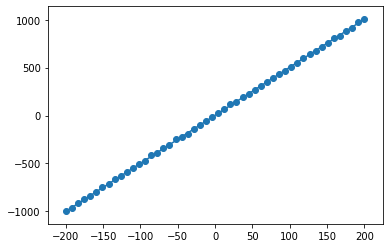

In [2]:
"""
Cette classe contient une représentation plus complète d'un réseau de neurones multicouches.
"""
from keras.models import Sequential
from keras.layers import Dense, Activation

x = np.linspace(-200,200,1000).reshape((-1,1))
y = 5 * x + 3 + np.random.normal(0,5,x.shape)

model = Sequential([
    Dense(1, input_shape=(1,)),
    Activation('linear'),
    Dense(10,),
    Activation('linear'),
    Dense(1,),
    Activation('linear'),
])
model.compile(optimizer='rmsprop',
              loss='mse')
# Train the model, iterating on the data in batches of 32 samples
model.fit(x, y, epochs=100, batch_size=32)
#Calcul des prédictions
y_pred = model.predict(x)
#Tracage du modèle : 
plt.plot(x,y_pred)

x = np.linspace(-200,200,50).reshape((-1,1))
y = 5 * x + 3 + np.random.normal(0,5,x.shape)
plt.scatter(x,y)
plt.show()

On va tester ça sur l'exemple de tout a l'heure a présent : 

In [3]:
X, y = load_boston(return_X_y=True)
model = Sequential([
    Dense(1, input_shape=(13,)),
    Activation('linear'),
])
model.compile(optimizer='rmsprop',
              loss='mse')
model.fit(X, y, epochs=10000, batch_size=100)

Epoch 1/10000
506/506 [==============================] - 0s 62us/step - loss: 30556.9377
Epoch 2/10000
506/506 [==============================] - 0s 7us/step - loss: 27598.0698
Epoch 3/10000
506/506 [==============================] - 0s 8us/step - loss: 25530.7077
Epoch 4/10000
506/506 [==============================] - 0s 8us/step - loss: 23622.6288
Epoch 5/10000
506/506 [==============================] - 0s 16us/step - loss: 22011.7189
Epoch 6/10000
506/506 [==============================] - 0s 10us/step - loss: 20431.3024
Epoch 7/10000
506/506 [==============================] - 0s 10us/step - loss: 18982.3908
Epoch 8/10000
506/506 [==============================] - 0s 12us/step - loss: 17657.5000
Epoch 9/10000
506/506 [==============================] - 0s 20us/step - loss: 16323.1012
Epoch 10/10000
506/506 [==============================] - 0s 17us/step - loss: 14989.7921
Epoch 11/10000
506/506 [==============================] - 0s 16us/step - loss: 13839.5533
Epoch 12/10000
506/506

Epoch 94/10000
506/506 [==============================] - 0s 14us/step - loss: 79.1309
Epoch 95/10000
506/506 [==============================] - 0s 16us/step - loss: 77.2484
Epoch 96/10000
506/506 [==============================] - 0s 14us/step - loss: 76.6892
Epoch 97/10000
506/506 [==============================] - 0s 20us/step - loss: 78.4683
Epoch 98/10000
506/506 [==============================] - 0s 12us/step - loss: 75.7048
Epoch 99/10000
506/506 [==============================] - 0s 15us/step - loss: 75.2266
Epoch 100/10000
506/506 [==============================] - 0s 27us/step - loss: 74.3196
Epoch 101/10000
506/506 [==============================] - 0s 17us/step - loss: 74.2846
Epoch 102/10000
506/506 [==============================] - 0s 20us/step - loss: 73.5308
Epoch 103/10000
506/506 [==============================] - 0s 41us/step - loss: 74.2136
Epoch 104/10000
506/506 [==============================] - 0s 22us/step - loss: 72.1818
Epoch 105/10000
506/506 [=============

506/506 [==============================] - 0s 10us/step - loss: 53.5546
Epoch 188/10000
506/506 [==============================] - 0s 13us/step - loss: 54.6903
Epoch 189/10000
506/506 [==============================] - 0s 8us/step - loss: 53.8335
Epoch 190/10000
506/506 [==============================] - 0s 8us/step - loss: 53.3848
Epoch 191/10000
506/506 [==============================] - 0s 9us/step - loss: 53.8502
Epoch 192/10000
506/506 [==============================] - 0s 9us/step - loss: 53.1219
Epoch 193/10000
506/506 [==============================] - 0s 9us/step - loss: 53.2320
Epoch 194/10000
506/506 [==============================] - 0s 12us/step - loss: 53.6696
Epoch 195/10000
506/506 [==============================] - 0s 12us/step - loss: 53.2794
Epoch 196/10000
506/506 [==============================] - 0s 11us/step - loss: 52.7230
Epoch 197/10000
506/506 [==============================] - 0s 9us/step - loss: 52.3299
Epoch 198/10000
506/506 [=============================

506/506 [==============================] - 0s 17us/step - loss: 47.0083
Epoch 281/10000
506/506 [==============================] - 0s 20us/step - loss: 47.1255
Epoch 282/10000
506/506 [==============================] - 0s 14us/step - loss: 46.9908
Epoch 283/10000
506/506 [==============================] - 0s 13us/step - loss: 46.4261
Epoch 284/10000
506/506 [==============================] - 0s 18us/step - loss: 47.1768
Epoch 285/10000
506/506 [==============================] - 0s 15us/step - loss: 46.4900
Epoch 286/10000
506/506 [==============================] - 0s 10us/step - loss: 46.4091
Epoch 287/10000
506/506 [==============================] - 0s 11us/step - loss: 48.0729
Epoch 288/10000
506/506 [==============================] - 0s 16us/step - loss: 46.3837
Epoch 289/10000
506/506 [==============================] - 0s 12us/step - loss: 46.2215
Epoch 290/10000
506/506 [==============================] - 0s 15us/step - loss: 46.6603
Epoch 291/10000
506/506 [=======================

506/506 [==============================] - 0s 13us/step - loss: 43.3646
Epoch 374/10000
506/506 [==============================] - 0s 15us/step - loss: 43.7142
Epoch 375/10000
506/506 [==============================] - 0s 20us/step - loss: 43.6791
Epoch 376/10000
506/506 [==============================] - 0s 16us/step - loss: 43.1688
Epoch 377/10000
506/506 [==============================] - 0s 22us/step - loss: 43.1394
Epoch 378/10000
506/506 [==============================] - 0s 33us/step - loss: 43.0390
Epoch 379/10000
506/506 [==============================] - 0s 16us/step - loss: 44.2783
Epoch 380/10000
506/506 [==============================] - 0s 13us/step - loss: 43.8058
Epoch 381/10000
506/506 [==============================] - 0s 15us/step - loss: 43.8540
Epoch 382/10000
506/506 [==============================] - 0s 23us/step - loss: 43.4001
Epoch 383/10000
506/506 [==============================] - 0s 14us/step - loss: 44.4938
Epoch 384/10000
506/506 [=======================

506/506 [==============================] - 0s 13us/step - loss: 45.9385
Epoch 467/10000
506/506 [==============================] - 0s 17us/step - loss: 42.2159
Epoch 468/10000
506/506 [==============================] - 0s 22us/step - loss: 41.3577
Epoch 469/10000
506/506 [==============================] - 0s 13us/step - loss: 41.2837
Epoch 470/10000
506/506 [==============================] - 0s 8us/step - loss: 42.3829
Epoch 471/10000
506/506 [==============================] - 0s 23us/step - loss: 42.0166
Epoch 472/10000
506/506 [==============================] - 0s 19us/step - loss: 41.6575
Epoch 473/10000
506/506 [==============================] - 0s 15us/step - loss: 41.9731
Epoch 474/10000
506/506 [==============================] - 0s 10us/step - loss: 41.1444
Epoch 475/10000
506/506 [==============================] - 0s 19us/step - loss: 41.3790
Epoch 476/10000
506/506 [==============================] - 0s 14us/step - loss: 42.1828
Epoch 477/10000
506/506 [========================

506/506 [==============================] - 0s 10us/step - loss: 40.0232
Epoch 560/10000
506/506 [==============================] - 0s 14us/step - loss: 41.4340
Epoch 561/10000
506/506 [==============================] - 0s 11us/step - loss: 39.6951
Epoch 562/10000
506/506 [==============================] - 0s 18us/step - loss: 39.8272
Epoch 563/10000
506/506 [==============================] - 0s 12us/step - loss: 40.3148
Epoch 564/10000
506/506 [==============================] - 0s 17us/step - loss: 40.5892
Epoch 565/10000
506/506 [==============================] - 0s 12us/step - loss: 40.1606
Epoch 566/10000
506/506 [==============================] - 0s 12us/step - loss: 39.6645
Epoch 567/10000
506/506 [==============================] - 0s 14us/step - loss: 39.8663
Epoch 568/10000
506/506 [==============================] - 0s 12us/step - loss: 39.8675
Epoch 569/10000
506/506 [==============================] - 0s 14us/step - loss: 39.8995
Epoch 570/10000
506/506 [=======================

506/506 [==============================] - 0s 12us/step - loss: 39.0228
Epoch 653/10000
506/506 [==============================] - 0s 10us/step - loss: 38.4535
Epoch 654/10000
506/506 [==============================] - 0s 14us/step - loss: 39.4664
Epoch 655/10000
506/506 [==============================] - 0s 11us/step - loss: 38.3616
Epoch 656/10000
506/506 [==============================] - 0s 19us/step - loss: 38.5479
Epoch 657/10000
506/506 [==============================] - 0s 14us/step - loss: 38.2833
Epoch 658/10000
506/506 [==============================] - 0s 10us/step - loss: 38.3025
Epoch 659/10000
506/506 [==============================] - 0s 11us/step - loss: 39.3125
Epoch 660/10000
506/506 [==============================] - 0s 16us/step - loss: 38.7322
Epoch 661/10000
506/506 [==============================] - 0s 14us/step - loss: 39.3568
Epoch 662/10000
506/506 [==============================] - 0s 9us/step - loss: 38.0853
Epoch 663/10000
506/506 [========================

506/506 [==============================] - 0s 11us/step - loss: 36.9985
Epoch 746/10000
506/506 [==============================] - 0s 11us/step - loss: 37.6437
Epoch 747/10000
506/506 [==============================] - 0s 12us/step - loss: 37.0320
Epoch 748/10000
506/506 [==============================] - 0s 12us/step - loss: 37.5536
Epoch 749/10000
506/506 [==============================] - 0s 16us/step - loss: 38.1338
Epoch 750/10000
506/506 [==============================] - 0s 15us/step - loss: 37.7525
Epoch 751/10000
506/506 [==============================] - 0s 15us/step - loss: 38.3674
Epoch 752/10000
506/506 [==============================] - 0s 13us/step - loss: 37.0699
Epoch 753/10000
506/506 [==============================] - 0s 18us/step - loss: 37.2048
Epoch 754/10000
506/506 [==============================] - 0s 13us/step - loss: 37.6745
Epoch 755/10000
506/506 [==============================] - 0s 15us/step - loss: 36.8775
Epoch 756/10000
506/506 [=======================

506/506 [==============================] - 0s 12us/step - loss: 36.2551
Epoch 839/10000
506/506 [==============================] - 0s 14us/step - loss: 36.3561
Epoch 840/10000
506/506 [==============================] - 0s 14us/step - loss: 35.8532
Epoch 841/10000
506/506 [==============================] - 0s 25us/step - loss: 36.0433
Epoch 842/10000
506/506 [==============================] - 0s 13us/step - loss: 36.2532
Epoch 843/10000
506/506 [==============================] - 0s 12us/step - loss: 37.2867
Epoch 844/10000
506/506 [==============================] - 0s 20us/step - loss: 37.3121
Epoch 845/10000
506/506 [==============================] - 0s 19us/step - loss: 35.8837
Epoch 846/10000
506/506 [==============================] - 0s 15us/step - loss: 35.9592
Epoch 847/10000
506/506 [==============================] - 0s 15us/step - loss: 36.1773
Epoch 848/10000
506/506 [==============================] - 0s 18us/step - loss: 38.0582
Epoch 849/10000
506/506 [=======================

506/506 [==============================] - 0s 18us/step - loss: 34.9926
Epoch 932/10000
506/506 [==============================] - 0s 20us/step - loss: 35.0742
Epoch 933/10000
506/506 [==============================] - 0s 12us/step - loss: 35.7070
Epoch 934/10000
506/506 [==============================] - 0s 13us/step - loss: 36.6062
Epoch 935/10000
506/506 [==============================] - 0s 12us/step - loss: 34.8973
Epoch 936/10000
506/506 [==============================] - 0s 17us/step - loss: 35.3526
Epoch 937/10000
506/506 [==============================] - 0s 14us/step - loss: 35.0050
Epoch 938/10000
506/506 [==============================] - 0s 12us/step - loss: 34.7613
Epoch 939/10000
506/506 [==============================] - 0s 19us/step - loss: 35.6354
Epoch 940/10000
506/506 [==============================] - 0s 17us/step - loss: 35.2876
Epoch 941/10000
506/506 [==============================] - 0s 12us/step - loss: 35.1430
Epoch 942/10000
506/506 [=======================

506/506 [==============================] - 0s 9us/step - loss: 33.9391
Epoch 1024/10000
506/506 [==============================] - 0s 17us/step - loss: 34.8113
Epoch 1025/10000
506/506 [==============================] - 0s 23us/step - loss: 34.2538
Epoch 1026/10000
506/506 [==============================] - 0s 16us/step - loss: 34.9817
Epoch 1027/10000
506/506 [==============================] - 0s 16us/step - loss: 34.0061
Epoch 1028/10000
506/506 [==============================] - 0s 13us/step - loss: 34.4604
Epoch 1029/10000
506/506 [==============================] - 0s 12us/step - loss: 33.8598
Epoch 1030/10000
506/506 [==============================] - 0s 12us/step - loss: 34.8091
Epoch 1031/10000
506/506 [==============================] - 0s 15us/step - loss: 34.8012
Epoch 1032/10000
506/506 [==============================] - 0s 13us/step - loss: 34.2759
Epoch 1033/10000
506/506 [==============================] - 0s 19us/step - loss: 34.7509
Epoch 1034/10000
506/506 [=============

506/506 [==============================] - 0s 11us/step - loss: 33.4016
Epoch 1116/10000
506/506 [==============================] - 0s 16us/step - loss: 33.8325
Epoch 1117/10000
506/506 [==============================] - 0s 30us/step - loss: 34.1361
Epoch 1118/10000
506/506 [==============================] - 0s 14us/step - loss: 33.2055
Epoch 1119/10000
506/506 [==============================] - 0s 17us/step - loss: 33.6531
Epoch 1120/10000
506/506 [==============================] - 0s 17us/step - loss: 33.0955
Epoch 1121/10000
506/506 [==============================] - 0s 15us/step - loss: 34.7897
Epoch 1122/10000
506/506 [==============================] - 0s 13us/step - loss: 33.0789
Epoch 1123/10000
506/506 [==============================] - 0s 10us/step - loss: 34.2159
Epoch 1124/10000
506/506 [==============================] - 0s 17us/step - loss: 32.9543
Epoch 1125/10000
506/506 [==============================] - 0s 22us/step - loss: 33.1197
Epoch 1126/10000
506/506 [============

506/506 [==============================] - 0s 17us/step - loss: 32.3038
Epoch 1208/10000
506/506 [==============================] - 0s 10us/step - loss: 33.1786
Epoch 1209/10000
506/506 [==============================] - 0s 10us/step - loss: 32.4094
Epoch 1210/10000
506/506 [==============================] - 0s 9us/step - loss: 32.7991
Epoch 1211/10000
506/506 [==============================] - 0s 13us/step - loss: 33.1157
Epoch 1212/10000
506/506 [==============================] - 0s 14us/step - loss: 33.4393
Epoch 1213/10000
506/506 [==============================] - 0s 8us/step - loss: 32.4414
Epoch 1214/10000
506/506 [==============================] - 0s 9us/step - loss: 32.5176
Epoch 1215/10000
506/506 [==============================] - 0s 10us/step - loss: 34.8983
Epoch 1216/10000
506/506 [==============================] - 0s 9us/step - loss: 32.2480
Epoch 1217/10000
506/506 [==============================] - 0s 12us/step - loss: 32.7598
Epoch 1218/10000
506/506 [================

506/506 [==============================] - 0s 13us/step - loss: 32.2095
Epoch 1300/10000
506/506 [==============================] - 0s 15us/step - loss: 32.1816
Epoch 1301/10000
506/506 [==============================] - 0s 12us/step - loss: 32.4529
Epoch 1302/10000
506/506 [==============================] - 0s 9us/step - loss: 31.6366
Epoch 1303/10000
506/506 [==============================] - 0s 11us/step - loss: 32.4594
Epoch 1304/10000
506/506 [==============================] - 0s 18us/step - loss: 31.8198
Epoch 1305/10000
506/506 [==============================] - 0s 11us/step - loss: 31.9628
Epoch 1306/10000
506/506 [==============================] - 0s 13us/step - loss: 31.8214
Epoch 1307/10000
506/506 [==============================] - 0s 14us/step - loss: 32.0999
Epoch 1308/10000
506/506 [==============================] - 0s 17us/step - loss: 33.2184
Epoch 1309/10000
506/506 [==============================] - 0s 20us/step - loss: 31.7521
Epoch 1310/10000
506/506 [=============

506/506 [==============================] - 0s 9us/step - loss: 31.1062
Epoch 1392/10000
506/506 [==============================] - 0s 13us/step - loss: 31.9725
Epoch 1393/10000
506/506 [==============================] - 0s 13us/step - loss: 30.9257
Epoch 1394/10000
506/506 [==============================] - 0s 10us/step - loss: 31.9866
Epoch 1395/10000
506/506 [==============================] - 0s 9us/step - loss: 30.9794
Epoch 1396/10000
506/506 [==============================] - 0s 9us/step - loss: 31.5050
Epoch 1397/10000
506/506 [==============================] - 0s 13us/step - loss: 31.2528
Epoch 1398/10000
506/506 [==============================] - 0s 12us/step - loss: 32.2857
Epoch 1399/10000
506/506 [==============================] - 0s 9us/step - loss: 31.0071
Epoch 1400/10000
506/506 [==============================] - 0s 9us/step - loss: 31.0262
Epoch 1401/10000
506/506 [==============================] - 0s 10us/step - loss: 31.3946
Epoch 1402/10000
506/506 [=================

506/506 [==============================] - 0s 11us/step - loss: 30.9014
Epoch 1484/10000
506/506 [==============================] - 0s 9us/step - loss: 30.5873
Epoch 1485/10000
506/506 [==============================] - 0s 12us/step - loss: 33.4680
Epoch 1486/10000
506/506 [==============================] - 0s 8us/step - loss: 30.5886
Epoch 1487/10000
506/506 [==============================] - 0s 10us/step - loss: 30.4237
Epoch 1488/10000
506/506 [==============================] - 0s 11us/step - loss: 31.7976
Epoch 1489/10000
506/506 [==============================] - 0s 10us/step - loss: 30.9610
Epoch 1490/10000
506/506 [==============================] - 0s 8us/step - loss: 30.4040
Epoch 1491/10000
506/506 [==============================] - 0s 10us/step - loss: 30.9524
Epoch 1492/10000
506/506 [==============================] - 0s 12us/step - loss: 30.3362
Epoch 1493/10000
506/506 [==============================] - 0s 11us/step - loss: 31.0961
Epoch 1494/10000
506/506 [===============

506/506 [==============================] - 0s 9us/step - loss: 29.9959
Epoch 1576/10000
506/506 [==============================] - 0s 8us/step - loss: 30.5245
Epoch 1577/10000
506/506 [==============================] - 0s 14us/step - loss: 30.0329
Epoch 1578/10000
506/506 [==============================] - 0s 13us/step - loss: 30.8788
Epoch 1579/10000
506/506 [==============================] - 0s 10us/step - loss: 30.3071
Epoch 1580/10000
506/506 [==============================] - 0s 10us/step - loss: 29.8230
Epoch 1581/10000
506/506 [==============================] - 0s 10us/step - loss: 30.2377
Epoch 1582/10000
506/506 [==============================] - 0s 12us/step - loss: 30.3993
Epoch 1583/10000
506/506 [==============================] - 0s 13us/step - loss: 30.6584
Epoch 1584/10000
506/506 [==============================] - 0s 12us/step - loss: 29.8927
Epoch 1585/10000
506/506 [==============================] - 0s 9us/step - loss: 30.1800
Epoch 1586/10000
506/506 [===============

506/506 [==============================] - 0s 9us/step - loss: 29.5875
Epoch 1668/10000
506/506 [==============================] - 0s 9us/step - loss: 29.5267
Epoch 1669/10000
506/506 [==============================] - 0s 11us/step - loss: 30.4587
Epoch 1670/10000
506/506 [==============================] - 0s 12us/step - loss: 29.9215
Epoch 1671/10000
506/506 [==============================] - 0s 10us/step - loss: 29.7874
Epoch 1672/10000
506/506 [==============================] - 0s 13us/step - loss: 30.3614
Epoch 1673/10000
506/506 [==============================] - 0s 10us/step - loss: 30.0497
Epoch 1674/10000
506/506 [==============================] - 0s 10us/step - loss: 29.8226
Epoch 1675/10000
506/506 [==============================] - 0s 13us/step - loss: 30.1660
Epoch 1676/10000
506/506 [==============================] - 0s 13us/step - loss: 29.1952
Epoch 1677/10000
506/506 [==============================] - 0s 11us/step - loss: 29.6006
Epoch 1678/10000
506/506 [==============

506/506 [==============================] - 0s 11us/step - loss: 29.1597
Epoch 1760/10000
506/506 [==============================] - 0s 13us/step - loss: 30.0702
Epoch 1761/10000
506/506 [==============================] - 0s 10us/step - loss: 29.4134
Epoch 1762/10000
506/506 [==============================] - 0s 15us/step - loss: 30.7417
Epoch 1763/10000
506/506 [==============================] - 0s 8us/step - loss: 29.2412
Epoch 1764/10000
506/506 [==============================] - 0s 18us/step - loss: 29.0097
Epoch 1765/10000
506/506 [==============================] - 0s 20us/step - loss: 29.9678
Epoch 1766/10000
506/506 [==============================] - 0s 20us/step - loss: 30.0305
Epoch 1767/10000
506/506 [==============================] - 0s 15us/step - loss: 29.0924
Epoch 1768/10000
506/506 [==============================] - 0s 12us/step - loss: 30.3798
Epoch 1769/10000
506/506 [==============================] - 0s 18us/step - loss: 29.0296
Epoch 1770/10000
506/506 [=============

506/506 [==============================] - 0s 11us/step - loss: 28.6508
Epoch 1852/10000
506/506 [==============================] - 0s 21us/step - loss: 28.8777
Epoch 1853/10000
506/506 [==============================] - 0s 13us/step - loss: 29.5338
Epoch 1854/10000
506/506 [==============================] - 0s 22us/step - loss: 28.5666
Epoch 1855/10000
506/506 [==============================] - 0s 15us/step - loss: 28.8733
Epoch 1856/10000
506/506 [==============================] - 0s 16us/step - loss: 28.5447
Epoch 1857/10000
506/506 [==============================] - 0s 20us/step - loss: 29.3781
Epoch 1858/10000
506/506 [==============================] - 0s 21us/step - loss: 28.9218
Epoch 1859/10000
506/506 [==============================] - 0s 17us/step - loss: 28.5882
Epoch 1860/10000
506/506 [==============================] - 0s 16us/step - loss: 29.0293
Epoch 1861/10000
506/506 [==============================] - 0s 17us/step - loss: 28.7322
Epoch 1862/10000
506/506 [============

Epoch 1943/10000
506/506 [==============================] - 0s 12us/step - loss: 28.8644
Epoch 1944/10000
506/506 [==============================] - 0s 15us/step - loss: 28.0515
Epoch 1945/10000
506/506 [==============================] - 0s 14us/step - loss: 28.5154
Epoch 1946/10000
506/506 [==============================] - 0s 18us/step - loss: 28.4351
Epoch 1947/10000
506/506 [==============================] - 0s 15us/step - loss: 29.4492
Epoch 1948/10000
506/506 [==============================] - 0s 13us/step - loss: 28.8920
Epoch 1949/10000
506/506 [==============================] - 0s 14us/step - loss: 28.1873
Epoch 1950/10000
506/506 [==============================] - 0s 13us/step - loss: 29.6943
Epoch 1951/10000
506/506 [==============================] - 0s 19us/step - loss: 28.3397
Epoch 1952/10000
506/506 [==============================] - 0s 16us/step - loss: 28.4776
Epoch 1953/10000
506/506 [==============================] - 0s 13us/step - loss: 29.3684
Epoch 1954/10000
506/

506/506 [==============================] - 0s 16us/step - loss: 28.2614
Epoch 2036/10000
506/506 [==============================] - 0s 14us/step - loss: 28.5693
Epoch 2037/10000
506/506 [==============================] - 0s 10us/step - loss: 27.9790
Epoch 2038/10000
506/506 [==============================] - 0s 11us/step - loss: 28.2749
Epoch 2039/10000
506/506 [==============================] - 0s 10us/step - loss: 27.7826
Epoch 2040/10000
506/506 [==============================] - 0s 10us/step - loss: 27.9736
Epoch 2041/10000
506/506 [==============================] - 0s 10us/step - loss: 28.2716
Epoch 2042/10000
506/506 [==============================] - 0s 10us/step - loss: 28.0422
Epoch 2043/10000
506/506 [==============================] - 0s 8us/step - loss: 29.2894
Epoch 2044/10000
506/506 [==============================] - 0s 8us/step - loss: 27.9638
Epoch 2045/10000
506/506 [==============================] - 0s 8us/step - loss: 28.3332
Epoch 2046/10000
506/506 [===============

506/506 [==============================] - 0s 18us/step - loss: 27.4579
Epoch 2128/10000
506/506 [==============================] - 0s 16us/step - loss: 27.8814
Epoch 2129/10000
506/506 [==============================] - 0s 20us/step - loss: 28.1595
Epoch 2130/10000
506/506 [==============================] - 0s 21us/step - loss: 27.9869
Epoch 2131/10000
506/506 [==============================] - 0s 13us/step - loss: 27.6499
Epoch 2132/10000
506/506 [==============================] - 0s 26us/step - loss: 27.7394
Epoch 2133/10000
506/506 [==============================] - 0s 13us/step - loss: 28.3645
Epoch 2134/10000
506/506 [==============================] - 0s 12us/step - loss: 29.8991
Epoch 2135/10000
506/506 [==============================] - 0s 17us/step - loss: 27.5009
Epoch 2136/10000
506/506 [==============================] - 0s 19us/step - loss: 27.4748
Epoch 2137/10000
506/506 [==============================] - 0s 18us/step - loss: 28.4614
Epoch 2138/10000
506/506 [============

506/506 [==============================] - 0s 9us/step - loss: 27.2546
Epoch 2220/10000
506/506 [==============================] - 0s 9us/step - loss: 28.0977
Epoch 2221/10000
506/506 [==============================] - 0s 10us/step - loss: 27.6489
Epoch 2222/10000
506/506 [==============================] - 0s 15us/step - loss: 28.1440
Epoch 2223/10000
506/506 [==============================] - 0s 14us/step - loss: 27.1483
Epoch 2224/10000
506/506 [==============================] - 0s 9us/step - loss: 27.5905
Epoch 2225/10000
506/506 [==============================] - 0s 11us/step - loss: 28.8531
Epoch 2226/10000
506/506 [==============================] - 0s 10us/step - loss: 27.3764
Epoch 2227/10000
506/506 [==============================] - 0s 15us/step - loss: 27.2230
Epoch 2228/10000
506/506 [==============================] - 0s 11us/step - loss: 27.7287
Epoch 2229/10000
506/506 [==============================] - 0s 12us/step - loss: 27.2621
Epoch 2230/10000
506/506 [===============

506/506 [==============================] - 0s 12us/step - loss: 27.2227
Epoch 2312/10000
506/506 [==============================] - 0s 9us/step - loss: 28.1690
Epoch 2313/10000
506/506 [==============================] - 0s 9us/step - loss: 27.0247
Epoch 2314/10000
506/506 [==============================] - 0s 12us/step - loss: 28.1221
Epoch 2315/10000
506/506 [==============================] - 0s 12us/step - loss: 27.0754
Epoch 2316/10000
506/506 [==============================] - 0s 11us/step - loss: 27.8388
Epoch 2317/10000
506/506 [==============================] - 0s 11us/step - loss: 27.1144
Epoch 2318/10000
506/506 [==============================] - 0s 9us/step - loss: 27.2799
Epoch 2319/10000
506/506 [==============================] - 0s 9us/step - loss: 27.3089
Epoch 2320/10000
506/506 [==============================] - 0s 12us/step - loss: 26.8874
Epoch 2321/10000
506/506 [==============================] - 0s 9us/step - loss: 27.3684
Epoch 2322/10000
506/506 [=================

506/506 [==============================] - 0s 13us/step - loss: 27.5408
Epoch 2404/10000
506/506 [==============================] - 0s 11us/step - loss: 27.1940
Epoch 2405/10000
506/506 [==============================] - 0s 10us/step - loss: 27.3449
Epoch 2406/10000
506/506 [==============================] - 0s 9us/step - loss: 29.1272
Epoch 2407/10000
506/506 [==============================] - 0s 14us/step - loss: 27.0723
Epoch 2408/10000
506/506 [==============================] - 0s 9us/step - loss: 27.2596
Epoch 2409/10000
506/506 [==============================] - 0s 10us/step - loss: 26.8720
Epoch 2410/10000
506/506 [==============================] - 0s 10us/step - loss: 26.7316
Epoch 2411/10000
506/506 [==============================] - 0s 9us/step - loss: 27.1390
Epoch 2412/10000
506/506 [==============================] - 0s 9us/step - loss: 26.8355
Epoch 2413/10000
506/506 [==============================] - 0s 13us/step - loss: 28.0733
Epoch 2414/10000
506/506 [================

506/506 [==============================] - 0s 12us/step - loss: 27.5719
Epoch 2496/10000
506/506 [==============================] - 0s 10us/step - loss: 27.0230
Epoch 2497/10000
506/506 [==============================] - 0s 12us/step - loss: 26.6222
Epoch 2498/10000
506/506 [==============================] - 0s 10us/step - loss: 26.6075
Epoch 2499/10000
506/506 [==============================] - 0s 8us/step - loss: 26.6054
Epoch 2500/10000
506/506 [==============================] - 0s 11us/step - loss: 26.6461
Epoch 2501/10000
506/506 [==============================] - 0s 12us/step - loss: 26.8967
Epoch 2502/10000
506/506 [==============================] - 0s 13us/step - loss: 27.1120
Epoch 2503/10000
506/506 [==============================] - 0s 9us/step - loss: 26.9488
Epoch 2504/10000
506/506 [==============================] - 0s 13us/step - loss: 26.7971
Epoch 2505/10000
506/506 [==============================] - 0s 11us/step - loss: 27.1451
Epoch 2506/10000
506/506 [==============

506/506 [==============================] - 0s 11us/step - loss: 26.6856
Epoch 2588/10000
506/506 [==============================] - 0s 12us/step - loss: 26.7390
Epoch 2589/10000
506/506 [==============================] - 0s 12us/step - loss: 26.3698
Epoch 2590/10000
506/506 [==============================] - 0s 12us/step - loss: 26.2953
Epoch 2591/10000
506/506 [==============================] - 0s 10us/step - loss: 26.7182
Epoch 2592/10000
506/506 [==============================] - 0s 11us/step - loss: 26.5784
Epoch 2593/10000
506/506 [==============================] - 0s 10us/step - loss: 26.7844
Epoch 2594/10000
506/506 [==============================] - 0s 10us/step - loss: 26.1928
Epoch 2595/10000
506/506 [==============================] - 0s 14us/step - loss: 26.3532
Epoch 2596/10000
506/506 [==============================] - 0s 9us/step - loss: 28.7504
Epoch 2597/10000
506/506 [==============================] - 0s 8us/step - loss: 26.7669
Epoch 2598/10000
506/506 [==============

506/506 [==============================] - 0s 11us/step - loss: 26.5117
Epoch 2680/10000
506/506 [==============================] - 0s 8us/step - loss: 26.3589
Epoch 2681/10000
506/506 [==============================] - 0s 10us/step - loss: 26.0705
Epoch 2682/10000
506/506 [==============================] - 0s 8us/step - loss: 27.3726
Epoch 2683/10000
506/506 [==============================] - 0s 12us/step - loss: 26.2357
Epoch 2684/10000
506/506 [==============================] - 0s 11us/step - loss: 26.2305
Epoch 2685/10000
506/506 [==============================] - 0s 12us/step - loss: 26.2398
Epoch 2686/10000
506/506 [==============================] - 0s 8us/step - loss: 26.3812
Epoch 2687/10000
506/506 [==============================] - 0s 10us/step - loss: 26.6020
Epoch 2688/10000
506/506 [==============================] - 0s 10us/step - loss: 26.4331
Epoch 2689/10000
506/506 [==============================] - 0s 13us/step - loss: 26.5233
Epoch 2690/10000
506/506 [===============

506/506 [==============================] - 0s 13us/step - loss: 26.0438
Epoch 2772/10000
506/506 [==============================] - 0s 10us/step - loss: 26.1678
Epoch 2773/10000
506/506 [==============================] - 0s 12us/step - loss: 26.2201
Epoch 2774/10000
506/506 [==============================] - 0s 9us/step - loss: 26.7847
Epoch 2775/10000
506/506 [==============================] - 0s 9us/step - loss: 26.5659
Epoch 2776/10000
506/506 [==============================] - 0s 10us/step - loss: 26.6954
Epoch 2777/10000
506/506 [==============================] - 0s 13us/step - loss: 26.1014
Epoch 2778/10000
506/506 [==============================] - 0s 10us/step - loss: 26.8622
Epoch 2779/10000
506/506 [==============================] - 0s 10us/step - loss: 26.1136
Epoch 2780/10000
506/506 [==============================] - 0s 10us/step - loss: 26.9607
Epoch 2781/10000
506/506 [==============================] - 0s 10us/step - loss: 26.0540
Epoch 2782/10000
506/506 [==============

506/506 [==============================] - 0s 11us/step - loss: 26.1448
Epoch 2864/10000
506/506 [==============================] - 0s 9us/step - loss: 26.7135
Epoch 2865/10000
506/506 [==============================] - 0s 9us/step - loss: 25.8914
Epoch 2866/10000
506/506 [==============================] - 0s 16us/step - loss: 26.3463
Epoch 2867/10000
506/506 [==============================] - 0s 11us/step - loss: 26.0614
Epoch 2868/10000
506/506 [==============================] - 0s 9us/step - loss: 25.8936
Epoch 2869/10000
506/506 [==============================] - 0s 8us/step - loss: 26.6036
Epoch 2870/10000
506/506 [==============================] - 0s 9us/step - loss: 27.0518
Epoch 2871/10000
506/506 [==============================] - 0s 10us/step - loss: 25.7214
Epoch 2872/10000
506/506 [==============================] - 0s 15us/step - loss: 26.8775
Epoch 2873/10000
506/506 [==============================] - 0s 10us/step - loss: 26.1718
Epoch 2874/10000
506/506 [=================

506/506 [==============================] - 0s 10us/step - loss: 25.9096
Epoch 2956/10000
506/506 [==============================] - 0s 13us/step - loss: 25.7838
Epoch 2957/10000
506/506 [==============================] - 0s 11us/step - loss: 27.2141
Epoch 2958/10000
506/506 [==============================] - 0s 10us/step - loss: 25.9621
Epoch 2959/10000
506/506 [==============================] - 0s 10us/step - loss: 25.6871
Epoch 2960/10000
506/506 [==============================] - 0s 11us/step - loss: 25.8326
Epoch 2961/10000
506/506 [==============================] - 0s 7us/step - loss: 26.0627
Epoch 2962/10000
506/506 [==============================] - 0s 12us/step - loss: 26.3955
Epoch 2963/10000
506/506 [==============================] - 0s 11us/step - loss: 25.8059
Epoch 2964/10000
506/506 [==============================] - 0s 8us/step - loss: 25.8513
Epoch 2965/10000
506/506 [==============================] - 0s 11us/step - loss: 26.1534
Epoch 2966/10000
506/506 [==============

506/506 [==============================] - 0s 9us/step - loss: 25.3087
Epoch 3048/10000
506/506 [==============================] - 0s 11us/step - loss: 25.5117
Epoch 3049/10000
506/506 [==============================] - 0s 8us/step - loss: 26.8301
Epoch 3050/10000
506/506 [==============================] - 0s 14us/step - loss: 25.5000
Epoch 3051/10000
506/506 [==============================] - 0s 11us/step - loss: 25.4755
Epoch 3052/10000
506/506 [==============================] - 0s 11us/step - loss: 25.7803
Epoch 3053/10000
506/506 [==============================] - 0s 9us/step - loss: 25.2706
Epoch 3054/10000
506/506 [==============================] - 0s 11us/step - loss: 26.1536
Epoch 3055/10000
506/506 [==============================] - 0s 10us/step - loss: 27.1484
Epoch 3056/10000
506/506 [==============================] - 0s 13us/step - loss: 25.5091
Epoch 3057/10000
506/506 [==============================] - 0s 10us/step - loss: 26.5411
Epoch 3058/10000
506/506 [===============

506/506 [==============================] - 0s 11us/step - loss: 25.4281
Epoch 3140/10000
506/506 [==============================] - 0s 13us/step - loss: 25.8198
Epoch 3141/10000
506/506 [==============================] - 0s 9us/step - loss: 26.0004
Epoch 3142/10000
506/506 [==============================] - 0s 10us/step - loss: 25.5333
Epoch 3143/10000
506/506 [==============================] - 0s 15us/step - loss: 25.9442
Epoch 3144/10000
506/506 [==============================] - 0s 12us/step - loss: 25.6964
Epoch 3145/10000
506/506 [==============================] - 0s 11us/step - loss: 25.4438
Epoch 3146/10000
506/506 [==============================] - 0s 8us/step - loss: 25.2691
Epoch 3147/10000
506/506 [==============================] - 0s 9us/step - loss: 25.5991
Epoch 3148/10000
506/506 [==============================] - 0s 9us/step - loss: 26.6700
Epoch 3149/10000
506/506 [==============================] - 0s 12us/step - loss: 25.9292
Epoch 3150/10000
506/506 [================

506/506 [==============================] - 0s 12us/step - loss: 25.6655
Epoch 3232/10000
506/506 [==============================] - 0s 10us/step - loss: 25.6790
Epoch 3233/10000
506/506 [==============================] - 0s 12us/step - loss: 25.4009
Epoch 3234/10000
506/506 [==============================] - 0s 11us/step - loss: 25.6175
Epoch 3235/10000
506/506 [==============================] - 0s 10us/step - loss: 25.9472
Epoch 3236/10000
506/506 [==============================] - 0s 9us/step - loss: 25.3665
Epoch 3237/10000
506/506 [==============================] - 0s 13us/step - loss: 25.7811
Epoch 3238/10000
506/506 [==============================] - 0s 12us/step - loss: 25.9629
Epoch 3239/10000
506/506 [==============================] - 0s 9us/step - loss: 25.2335
Epoch 3240/10000
506/506 [==============================] - 0s 9us/step - loss: 25.2931
Epoch 3241/10000
506/506 [==============================] - 0s 9us/step - loss: 26.3687
Epoch 3242/10000
506/506 [================

506/506 [==============================] - 0s 10us/step - loss: 25.3924
Epoch 3324/10000
506/506 [==============================] - 0s 11us/step - loss: 25.5857
Epoch 3325/10000
506/506 [==============================] - 0s 8us/step - loss: 25.3333
Epoch 3326/10000
506/506 [==============================] - 0s 12us/step - loss: 25.5485
Epoch 3327/10000
506/506 [==============================] - 0s 14us/step - loss: 25.1044
Epoch 3328/10000
506/506 [==============================] - 0s 10us/step - loss: 25.4154
Epoch 3329/10000
506/506 [==============================] - 0s 9us/step - loss: 25.0795
Epoch 3330/10000
506/506 [==============================] - 0s 10us/step - loss: 26.9465
Epoch 3331/10000
506/506 [==============================] - 0s 10us/step - loss: 25.6238
Epoch 3332/10000
506/506 [==============================] - 0s 13us/step - loss: 25.7262
Epoch 3333/10000
506/506 [==============================] - 0s 10us/step - loss: 25.0398
Epoch 3334/10000
506/506 [==============

506/506 [==============================] - 0s 10us/step - loss: 25.0519
Epoch 3416/10000
506/506 [==============================] - 0s 7us/step - loss: 26.3369
Epoch 3417/10000
506/506 [==============================] - 0s 11us/step - loss: 25.4752
Epoch 3418/10000
506/506 [==============================] - 0s 12us/step - loss: 26.0192
Epoch 3419/10000
506/506 [==============================] - 0s 13us/step - loss: 25.1932
Epoch 3420/10000
506/506 [==============================] - 0s 12us/step - loss: 25.1089
Epoch 3421/10000
506/506 [==============================] - 0s 9us/step - loss: 24.7710
Epoch 3422/10000
506/506 [==============================] - 0s 9us/step - loss: 26.2749
Epoch 3423/10000
506/506 [==============================] - 0s 8us/step - loss: 25.0316
Epoch 3424/10000
506/506 [==============================] - 0s 11us/step - loss: 25.2641
Epoch 3425/10000
506/506 [==============================] - 0s 13us/step - loss: 26.2678
Epoch 3426/10000
506/506 [================

506/506 [==============================] - 0s 9us/step - loss: 25.9293
Epoch 3508/10000
506/506 [==============================] - 0s 13us/step - loss: 24.9817
Epoch 3509/10000
506/506 [==============================] - 0s 12us/step - loss: 26.7620
Epoch 3510/10000
506/506 [==============================] - 0s 10us/step - loss: 25.4704
Epoch 3511/10000
506/506 [==============================] - 0s 9us/step - loss: 24.9697
Epoch 3512/10000
506/506 [==============================] - 0s 9us/step - loss: 25.1379
Epoch 3513/10000
506/506 [==============================] - 0s 10us/step - loss: 25.0565
Epoch 3514/10000
506/506 [==============================] - 0s 12us/step - loss: 24.7691
Epoch 3515/10000
506/506 [==============================] - 0s 10us/step - loss: 25.3646
Epoch 3516/10000
506/506 [==============================] - 0s 9us/step - loss: 25.6800
Epoch 3517/10000
506/506 [==============================] - 0s 10us/step - loss: 25.7726
Epoch 3518/10000
506/506 [================

506/506 [==============================] - 0s 10us/step - loss: 25.4570
Epoch 3600/10000
506/506 [==============================] - 0s 10us/step - loss: 25.0357
Epoch 3601/10000
506/506 [==============================] - 0s 32us/step - loss: 25.5886
Epoch 3602/10000
506/506 [==============================] - 0s 10us/step - loss: 24.8871
Epoch 3603/10000
506/506 [==============================] - 0s 22us/step - loss: 26.4161
Epoch 3604/10000
506/506 [==============================] - 0s 19us/step - loss: 24.9398
Epoch 3605/10000
506/506 [==============================] - 0s 29us/step - loss: 24.9376
Epoch 3606/10000
506/506 [==============================] - 0s 14us/step - loss: 25.2855
Epoch 3607/10000
506/506 [==============================] - 0s 13us/step - loss: 25.9752
Epoch 3608/10000
506/506 [==============================] - 0s 20us/step - loss: 25.9322
Epoch 3609/10000
506/506 [==============================] - 0s 20us/step - loss: 25.1427
Epoch 3610/10000
506/506 [============

506/506 [==============================] - 0s 12us/step - loss: 25.6219
Epoch 3692/10000
506/506 [==============================] - 0s 14us/step - loss: 25.0751
Epoch 3693/10000
506/506 [==============================] - 0s 14us/step - loss: 25.1357
Epoch 3694/10000
506/506 [==============================] - 0s 14us/step - loss: 25.7266
Epoch 3695/10000
506/506 [==============================] - 0s 14us/step - loss: 24.8928
Epoch 3696/10000
506/506 [==============================] - 0s 25us/step - loss: 25.1316
Epoch 3697/10000
506/506 [==============================] - 0s 27us/step - loss: 24.8297
Epoch 3698/10000
506/506 [==============================] - 0s 22us/step - loss: 25.0135
Epoch 3699/10000
506/506 [==============================] - 0s 20us/step - loss: 25.3372
Epoch 3700/10000
506/506 [==============================] - 0s 22us/step - loss: 25.3504
Epoch 3701/10000
506/506 [==============================] - 0s 32us/step - loss: 24.7738
Epoch 3702/10000
506/506 [============

506/506 [==============================] - 0s 11us/step - loss: 24.7994
Epoch 3784/10000
506/506 [==============================] - 0s 12us/step - loss: 25.1562
Epoch 3785/10000
506/506 [==============================] - 0s 9us/step - loss: 25.0928
Epoch 3786/10000
506/506 [==============================] - 0s 8us/step - loss: 25.2319
Epoch 3787/10000
506/506 [==============================] - 0s 13us/step - loss: 25.1928
Epoch 3788/10000
506/506 [==============================] - 0s 11us/step - loss: 24.9062
Epoch 3789/10000
506/506 [==============================] - 0s 11us/step - loss: 25.7042
Epoch 3790/10000
506/506 [==============================] - 0s 10us/step - loss: 25.4681
Epoch 3791/10000
506/506 [==============================] - 0s 10us/step - loss: 24.8873
Epoch 3792/10000
506/506 [==============================] - 0s 11us/step - loss: 25.0040
Epoch 3793/10000
506/506 [==============================] - 0s 11us/step - loss: 24.9009
Epoch 3794/10000
506/506 [==============

506/506 [==============================] - 0s 12us/step - loss: 25.7356
Epoch 3876/10000
506/506 [==============================] - 0s 10us/step - loss: 27.1198
Epoch 3877/10000
506/506 [==============================] - 0s 10us/step - loss: 24.7700
Epoch 3878/10000
506/506 [==============================] - 0s 11us/step - loss: 25.0921
Epoch 3879/10000
506/506 [==============================] - 0s 8us/step - loss: 25.1423
Epoch 3880/10000
100/506 [====>.........................] - ETA: 0s - loss: 20.6610

KeyboardInterrupt: 

On remarque que ça prend quand même pas mal de temps, et que c'est moins précis qu'une résolution directe alors pourquoi s'en servir plûtot que la résolution directe ?

In [4]:
X, y = load_boston(return_X_y=True)
model = Sequential([
    Dense(1, input_shape=(13,)),
    Activation('linear'),
    Dense(64,),
    Activation('relu'),
    Dense(64,),
    Activation('relu'),
    Dense(1,),
])
model.compile(optimizer='rmsprop',
              loss='mse')
model.fit(X, y, epochs=5000, batch_size=100)

Epoch 1/5000
506/506 [==============================] - 0s 141us/step - loss: 864.0139
Epoch 2/5000
506/506 [==============================] - 0s 13us/step - loss: 202.2274
Epoch 3/5000
506/506 [==============================] - 0s 18us/step - loss: 206.3637
Epoch 4/5000
506/506 [==============================] - 0s 15us/step - loss: 200.2039
Epoch 5/5000
506/506 [==============================] - 0s 17us/step - loss: 199.2292
Epoch 6/5000
506/506 [==============================] - 0s 19us/step - loss: 229.2127
Epoch 7/5000
506/506 [==============================] - 0s 20us/step - loss: 198.0448
Epoch 8/5000
506/506 [==============================] - 0s 15us/step - loss: 209.7648
Epoch 9/5000
506/506 [==============================] - 0s 17us/step - loss: 204.1686
Epoch 10/5000
506/506 [==============================] - 0s 20us/step - loss: 204.9206
Epoch 11/5000
506/506 [==============================] - 0s 43us/step - loss: 234.7743
Epoch 12/5000
506/506 [============================

506/506 [==============================] - 0s 15us/step - loss: 102.9460
Epoch 96/5000
506/506 [==============================] - 0s 18us/step - loss: 118.1583
Epoch 97/5000
506/506 [==============================] - 0s 20us/step - loss: 99.0539
Epoch 98/5000
506/506 [==============================] - 0s 17us/step - loss: 116.8481
Epoch 99/5000
506/506 [==============================] - 0s 13us/step - loss: 95.5039
Epoch 100/5000
506/506 [==============================] - 0s 18us/step - loss: 93.6548
Epoch 101/5000
506/506 [==============================] - 0s 18us/step - loss: 102.5775
Epoch 102/5000
506/506 [==============================] - 0s 19us/step - loss: 113.2378
Epoch 103/5000
506/506 [==============================] - 0s 14us/step - loss: 97.7111
Epoch 104/5000
506/506 [==============================] - 0s 22us/step - loss: 94.4762
Epoch 105/5000
506/506 [==============================] - 0s 15us/step - loss: 92.7684
Epoch 106/5000
506/506 [==============================] -

506/506 [==============================] - 0s 11us/step - loss: 71.7910
Epoch 190/5000
506/506 [==============================] - 0s 13us/step - loss: 61.8097
Epoch 191/5000
506/506 [==============================] - 0s 14us/step - loss: 61.5390
Epoch 192/5000
506/506 [==============================] - 0s 22us/step - loss: 62.2826
Epoch 193/5000
506/506 [==============================] - 0s 13us/step - loss: 62.6169
Epoch 194/5000
506/506 [==============================] - 0s 19us/step - loss: 61.6802
Epoch 195/5000
506/506 [==============================] - 0s 27us/step - loss: 66.6715
Epoch 196/5000
506/506 [==============================] - 0s 19us/step - loss: 60.7942
Epoch 197/5000
506/506 [==============================] - 0s 17us/step - loss: 63.1369
Epoch 198/5000
506/506 [==============================] - 0s 17us/step - loss: 64.8949
Epoch 199/5000
506/506 [==============================] - 0s 23us/step - loss: 67.9889
Epoch 200/5000
506/506 [==============================] - 

506/506 [==============================] - 0s 20us/step - loss: 55.5302
Epoch 284/5000
506/506 [==============================] - 0s 16us/step - loss: 55.6809
Epoch 285/5000
506/506 [==============================] - 0s 16us/step - loss: 58.8149
Epoch 286/5000
506/506 [==============================] - 0s 14us/step - loss: 54.9250
Epoch 287/5000
506/506 [==============================] - 0s 18us/step - loss: 53.8869
Epoch 288/5000
506/506 [==============================] - 0s 17us/step - loss: 58.2420
Epoch 289/5000
506/506 [==============================] - 0s 16us/step - loss: 53.5481
Epoch 290/5000
506/506 [==============================] - 0s 19us/step - loss: 57.9050
Epoch 291/5000
506/506 [==============================] - 0s 14us/step - loss: 54.0932
Epoch 292/5000
506/506 [==============================] - 0s 16us/step - loss: 56.1863
Epoch 293/5000
506/506 [==============================] - 0s 19us/step - loss: 54.4820
Epoch 294/5000
506/506 [==============================] - 

506/506 [==============================] - 0s 18us/step - loss: 46.6604
Epoch 378/5000
506/506 [==============================] - 0s 19us/step - loss: 44.7696
Epoch 379/5000
506/506 [==============================] - 0s 15us/step - loss: 45.3174
Epoch 380/5000
506/506 [==============================] - 0s 26us/step - loss: 48.0185
Epoch 381/5000
506/506 [==============================] - 0s 23us/step - loss: 43.7522
Epoch 382/5000
506/506 [==============================] - 0s 18us/step - loss: 43.7577
Epoch 383/5000
506/506 [==============================] - 0s 25us/step - loss: 44.6197
Epoch 384/5000
506/506 [==============================] - 0s 17us/step - loss: 44.0864
Epoch 385/5000
506/506 [==============================] - 0s 16us/step - loss: 44.2167
Epoch 386/5000
506/506 [==============================] - 0s 19us/step - loss: 45.1793
Epoch 387/5000
506/506 [==============================] - 0s 22us/step - loss: 44.3674
Epoch 388/5000
506/506 [==============================] - 

506/506 [==============================] - 0s 14us/step - loss: 33.2988
Epoch 472/5000
506/506 [==============================] - 0s 20us/step - loss: 33.2026
Epoch 473/5000
506/506 [==============================] - 0s 19us/step - loss: 32.1956
Epoch 474/5000
506/506 [==============================] - 0s 25us/step - loss: 33.6260
Epoch 475/5000
506/506 [==============================] - 0s 20us/step - loss: 32.0243
Epoch 476/5000
506/506 [==============================] - 0s 27us/step - loss: 31.4546
Epoch 477/5000
506/506 [==============================] - 0s 16us/step - loss: 31.2724
Epoch 478/5000
506/506 [==============================] - 0s 22us/step - loss: 32.4878
Epoch 479/5000
506/506 [==============================] - 0s 19us/step - loss: 31.3373
Epoch 480/5000
506/506 [==============================] - 0s 26us/step - loss: 31.7088
Epoch 481/5000
506/506 [==============================] - 0s 25us/step - loss: 31.4266
Epoch 482/5000
506/506 [==============================] - 

506/506 [==============================] - 0s 18us/step - loss: 22.7621
Epoch 566/5000
506/506 [==============================] - 0s 16us/step - loss: 26.2203
Epoch 567/5000
506/506 [==============================] - 0s 18us/step - loss: 22.2342
Epoch 568/5000
506/506 [==============================] - 0s 23us/step - loss: 22.1235
Epoch 569/5000
506/506 [==============================] - 0s 16us/step - loss: 22.8358
Epoch 570/5000
506/506 [==============================] - 0s 23us/step - loss: 22.7216
Epoch 571/5000
506/506 [==============================] - 0s 24us/step - loss: 24.9322
Epoch 572/5000
506/506 [==============================] - 0s 23us/step - loss: 22.1155
Epoch 573/5000
506/506 [==============================] - 0s 16us/step - loss: 22.1450
Epoch 574/5000
506/506 [==============================] - 0s 15us/step - loss: 22.1784
Epoch 575/5000
506/506 [==============================] - 0s 14us/step - loss: 22.1255
Epoch 576/5000
506/506 [==============================] - 

506/506 [==============================] - 0s 14us/step - loss: 19.7819
Epoch 660/5000
506/506 [==============================] - 0s 23us/step - loss: 19.8269
Epoch 661/5000
506/506 [==============================] - 0s 15us/step - loss: 19.8870
Epoch 662/5000
506/506 [==============================] - 0s 22us/step - loss: 21.2866
Epoch 663/5000
506/506 [==============================] - 0s 18us/step - loss: 19.4911
Epoch 664/5000
506/506 [==============================] - 0s 14us/step - loss: 21.3171
Epoch 665/5000
506/506 [==============================] - 0s 13us/step - loss: 19.6870
Epoch 666/5000
506/506 [==============================] - 0s 17us/step - loss: 20.2661
Epoch 667/5000
506/506 [==============================] - 0s 25us/step - loss: 19.6157
Epoch 668/5000
506/506 [==============================] - 0s 21us/step - loss: 19.7516
Epoch 669/5000
506/506 [==============================] - 0s 19us/step - loss: 19.8967
Epoch 670/5000
506/506 [==============================] - 

506/506 [==============================] - 0s 23us/step - loss: 19.3688
Epoch 754/5000
506/506 [==============================] - 0s 16us/step - loss: 20.0556
Epoch 755/5000
506/506 [==============================] - 0s 18us/step - loss: 19.3290
Epoch 756/5000
506/506 [==============================] - 0s 18us/step - loss: 19.2720
Epoch 757/5000
506/506 [==============================] - 0s 16us/step - loss: 19.2719
Epoch 758/5000
506/506 [==============================] - 0s 21us/step - loss: 20.8224
Epoch 759/5000
506/506 [==============================] - 0s 18us/step - loss: 19.7510
Epoch 760/5000
506/506 [==============================] - 0s 31us/step - loss: 19.3750
Epoch 761/5000
506/506 [==============================] - 0s 22us/step - loss: 20.3142
Epoch 762/5000
506/506 [==============================] - 0s 19us/step - loss: 19.9097
Epoch 763/5000
506/506 [==============================] - 0s 19us/step - loss: 21.3518
Epoch 764/5000
506/506 [==============================] - 

506/506 [==============================] - 0s 11us/step - loss: 20.4357
Epoch 848/5000
506/506 [==============================] - 0s 14us/step - loss: 19.0041
Epoch 849/5000
506/506 [==============================] - 0s 14us/step - loss: 20.2339
Epoch 850/5000
506/506 [==============================] - 0s 13us/step - loss: 18.5859
Epoch 851/5000
506/506 [==============================] - 0s 12us/step - loss: 18.6050
Epoch 852/5000
506/506 [==============================] - 0s 12us/step - loss: 20.2623
Epoch 853/5000
506/506 [==============================] - 0s 14us/step - loss: 18.7691
Epoch 854/5000
506/506 [==============================] - 0s 14us/step - loss: 19.2385
Epoch 855/5000
506/506 [==============================] - 0s 17us/step - loss: 20.1226
Epoch 856/5000
506/506 [==============================] - 0s 17us/step - loss: 20.1312
Epoch 857/5000
506/506 [==============================] - 0s 20us/step - loss: 18.9460
Epoch 858/5000
506/506 [==============================] - 

506/506 [==============================] - 0s 10us/step - loss: 18.2178
Epoch 942/5000
506/506 [==============================] - 0s 14us/step - loss: 18.7008
Epoch 943/5000
506/506 [==============================] - 0s 12us/step - loss: 20.2795
Epoch 944/5000
506/506 [==============================] - 0s 12us/step - loss: 18.0670
Epoch 945/5000
506/506 [==============================] - 0s 14us/step - loss: 19.0311
Epoch 946/5000
506/506 [==============================] - 0s 12us/step - loss: 19.8061
Epoch 947/5000
506/506 [==============================] - 0s 15us/step - loss: 18.9909
Epoch 948/5000
506/506 [==============================] - 0s 13us/step - loss: 18.6076
Epoch 949/5000
506/506 [==============================] - 0s 13us/step - loss: 19.4138
Epoch 950/5000
506/506 [==============================] - 0s 12us/step - loss: 18.7161
Epoch 951/5000
506/506 [==============================] - 0s 11us/step - loss: 21.7443
Epoch 952/5000
506/506 [==============================] - 

Epoch 1035/5000
506/506 [==============================] - 0s 13us/step - loss: 18.0482
Epoch 1036/5000
506/506 [==============================] - 0s 12us/step - loss: 18.5632
Epoch 1037/5000
506/506 [==============================] - 0s 12us/step - loss: 18.6749
Epoch 1038/5000
506/506 [==============================] - 0s 15us/step - loss: 19.0376
Epoch 1039/5000
506/506 [==============================] - 0s 15us/step - loss: 18.3968
Epoch 1040/5000
506/506 [==============================] - 0s 11us/step - loss: 18.8512
Epoch 1041/5000
506/506 [==============================] - 0s 12us/step - loss: 20.1753
Epoch 1042/5000
506/506 [==============================] - 0s 10us/step - loss: 17.8816
Epoch 1043/5000
506/506 [==============================] - 0s 16us/step - loss: 18.7407
Epoch 1044/5000
506/506 [==============================] - 0s 12us/step - loss: 20.4384
Epoch 1045/5000
506/506 [==============================] - 0s 11us/step - loss: 18.0261
Epoch 1046/5000
506/506 [=======

506/506 [==============================] - 0s 12us/step - loss: 19.7819
Epoch 1129/5000
506/506 [==============================] - 0s 11us/step - loss: 18.8218
Epoch 1130/5000
506/506 [==============================] - 0s 18us/step - loss: 18.7143
Epoch 1131/5000
506/506 [==============================] - 0s 14us/step - loss: 19.1229
Epoch 1132/5000
506/506 [==============================] - 0s 36us/step - loss: 17.8864
Epoch 1133/5000
506/506 [==============================] - 0s 17us/step - loss: 18.3524
Epoch 1134/5000
506/506 [==============================] - 0s 12us/step - loss: 19.3395
Epoch 1135/5000
506/506 [==============================] - 0s 12us/step - loss: 19.1194
Epoch 1136/5000
506/506 [==============================] - 0s 18us/step - loss: 18.6745
Epoch 1137/5000
506/506 [==============================] - 0s 20us/step - loss: 18.7560
Epoch 1138/5000
506/506 [==============================] - 0s 14us/step - loss: 18.1005
Epoch 1139/5000
506/506 [=======================

506/506 [==============================] - 0s 10us/step - loss: 17.6751
Epoch 1222/5000
506/506 [==============================] - 0s 14us/step - loss: 18.0653
Epoch 1223/5000
506/506 [==============================] - 0s 11us/step - loss: 18.7696
Epoch 1224/5000
506/506 [==============================] - 0s 16us/step - loss: 18.1319
Epoch 1225/5000
506/506 [==============================] - 0s 15us/step - loss: 19.0657
Epoch 1226/5000
506/506 [==============================] - 0s 10us/step - loss: 19.8774
Epoch 1227/5000
506/506 [==============================] - 0s 11us/step - loss: 18.0971
Epoch 1228/5000
506/506 [==============================] - 0s 10us/step - loss: 18.4056
Epoch 1229/5000
506/506 [==============================] - 0s 17us/step - loss: 19.8408
Epoch 1230/5000
506/506 [==============================] - 0s 15us/step - loss: 17.4078
Epoch 1231/5000
506/506 [==============================] - 0s 11us/step - loss: 18.1426
Epoch 1232/5000
506/506 [=======================

506/506 [==============================] - 0s 12us/step - loss: 18.0732
Epoch 1315/5000
506/506 [==============================] - 0s 11us/step - loss: 18.8975
Epoch 1316/5000
506/506 [==============================] - 0s 12us/step - loss: 19.1195
Epoch 1317/5000
506/506 [==============================] - 0s 15us/step - loss: 18.2403
Epoch 1318/5000
506/506 [==============================] - 0s 12us/step - loss: 20.2784
Epoch 1319/5000
506/506 [==============================] - 0s 10us/step - loss: 18.4571
Epoch 1320/5000
506/506 [==============================] - 0s 13us/step - loss: 17.7768
Epoch 1321/5000
506/506 [==============================] - 0s 12us/step - loss: 17.8849
Epoch 1322/5000
506/506 [==============================] - 0s 12us/step - loss: 17.5457
Epoch 1323/5000
506/506 [==============================] - 0s 11us/step - loss: 18.3038
Epoch 1324/5000
506/506 [==============================] - 0s 10us/step - loss: 18.5264
Epoch 1325/5000
506/506 [=======================

506/506 [==============================] - 0s 12us/step - loss: 19.7876
Epoch 1408/5000
506/506 [==============================] - 0s 11us/step - loss: 17.6267
Epoch 1409/5000
506/506 [==============================] - 0s 14us/step - loss: 18.3268
Epoch 1410/5000
506/506 [==============================] - 0s 12us/step - loss: 18.2657
Epoch 1411/5000
506/506 [==============================] - 0s 10us/step - loss: 18.1740
Epoch 1412/5000
506/506 [==============================] - 0s 10us/step - loss: 18.4825
Epoch 1413/5000
506/506 [==============================] - 0s 10us/step - loss: 18.4169
Epoch 1414/5000
506/506 [==============================] - 0s 15us/step - loss: 17.5376
Epoch 1415/5000
506/506 [==============================] - 0s 15us/step - loss: 18.3159
Epoch 1416/5000
506/506 [==============================] - 0s 12us/step - loss: 18.4900
Epoch 1417/5000
506/506 [==============================] - 0s 11us/step - loss: 17.9539
Epoch 1418/5000
506/506 [=======================

506/506 [==============================] - 0s 11us/step - loss: 17.8589
Epoch 1501/5000
506/506 [==============================] - 0s 13us/step - loss: 17.7707
Epoch 1502/5000
506/506 [==============================] - 0s 15us/step - loss: 18.0344
Epoch 1503/5000
506/506 [==============================] - 0s 14us/step - loss: 19.7297
Epoch 1504/5000
506/506 [==============================] - 0s 11us/step - loss: 19.9218
Epoch 1505/5000
506/506 [==============================] - 0s 12us/step - loss: 18.9295
Epoch 1506/5000
506/506 [==============================] - 0s 13us/step - loss: 17.3194
Epoch 1507/5000
506/506 [==============================] - 0s 13us/step - loss: 18.0535
Epoch 1508/5000
506/506 [==============================] - 0s 12us/step - loss: 17.5380
Epoch 1509/5000
506/506 [==============================] - 0s 13us/step - loss: 17.1565
Epoch 1510/5000
506/506 [==============================] - 0s 12us/step - loss: 20.0070
Epoch 1511/5000
506/506 [=======================

506/506 [==============================] - 0s 11us/step - loss: 18.3813
Epoch 1594/5000
506/506 [==============================] - 0s 12us/step - loss: 20.1101
Epoch 1595/5000
506/506 [==============================] - 0s 10us/step - loss: 17.7878
Epoch 1596/5000
506/506 [==============================] - 0s 15us/step - loss: 17.2041
Epoch 1597/5000
506/506 [==============================] - 0s 14us/step - loss: 18.6471
Epoch 1598/5000
506/506 [==============================] - 0s 11us/step - loss: 17.9115
Epoch 1599/5000
506/506 [==============================] - 0s 10us/step - loss: 18.7385
Epoch 1600/5000
506/506 [==============================] - 0s 12us/step - loss: 18.3182
Epoch 1601/5000
506/506 [==============================] - 0s 15us/step - loss: 17.2177
Epoch 1602/5000
506/506 [==============================] - 0s 12us/step - loss: 17.8213
Epoch 1603/5000
506/506 [==============================] - 0s 10us/step - loss: 18.3172
Epoch 1604/5000
506/506 [=======================

506/506 [==============================] - 0s 17us/step - loss: 18.5236
Epoch 1687/5000
506/506 [==============================] - 0s 16us/step - loss: 16.9885
Epoch 1688/5000
506/506 [==============================] - 0s 15us/step - loss: 17.8736
Epoch 1689/5000
506/506 [==============================] - 0s 15us/step - loss: 18.0368
Epoch 1690/5000
506/506 [==============================] - 0s 17us/step - loss: 18.3075
Epoch 1691/5000
506/506 [==============================] - 0s 14us/step - loss: 18.0053
Epoch 1692/5000
506/506 [==============================] - 0s 21us/step - loss: 19.4594
Epoch 1693/5000
506/506 [==============================] - 0s 15us/step - loss: 16.9359
Epoch 1694/5000
506/506 [==============================] - 0s 26us/step - loss: 18.4744
Epoch 1695/5000
506/506 [==============================] - 0s 16us/step - loss: 18.2734
Epoch 1696/5000
506/506 [==============================] - 0s 21us/step - loss: 17.3419
Epoch 1697/5000
506/506 [=======================

506/506 [==============================] - 0s 11us/step - loss: 17.7759
Epoch 1780/5000
506/506 [==============================] - 0s 15us/step - loss: 18.9011
Epoch 1781/5000
506/506 [==============================] - 0s 17us/step - loss: 17.1104
Epoch 1782/5000
506/506 [==============================] - 0s 20us/step - loss: 17.7128
Epoch 1783/5000
506/506 [==============================] - 0s 17us/step - loss: 16.9758
Epoch 1784/5000
506/506 [==============================] - 0s 20us/step - loss: 18.6036
Epoch 1785/5000
506/506 [==============================] - 0s 21us/step - loss: 19.8592
Epoch 1786/5000
506/506 [==============================] - 0s 14us/step - loss: 17.1638
Epoch 1787/5000
506/506 [==============================] - 0s 10us/step - loss: 17.3445
Epoch 1788/5000
506/506 [==============================] - 0s 14us/step - loss: 17.2497
Epoch 1789/5000
506/506 [==============================] - 0s 14us/step - loss: 19.2530
Epoch 1790/5000
506/506 [=======================

506/506 [==============================] - 0s 16us/step - loss: 18.4857
Epoch 1873/5000
506/506 [==============================] - 0s 10us/step - loss: 17.3803
Epoch 1874/5000
506/506 [==============================] - 0s 10us/step - loss: 16.8522
Epoch 1875/5000
506/506 [==============================] - 0s 15us/step - loss: 17.1434
Epoch 1876/5000
506/506 [==============================] - 0s 14us/step - loss: 18.0609
Epoch 1877/5000
506/506 [==============================] - 0s 13us/step - loss: 16.7125
Epoch 1878/5000
506/506 [==============================] - 0s 10us/step - loss: 19.5711
Epoch 1879/5000
506/506 [==============================] - 0s 10us/step - loss: 17.8068
Epoch 1880/5000
506/506 [==============================] - 0s 17us/step - loss: 17.3104
Epoch 1881/5000
506/506 [==============================] - 0s 13us/step - loss: 18.3521
Epoch 1882/5000
506/506 [==============================] - 0s 12us/step - loss: 17.1522
Epoch 1883/5000
506/506 [=======================

506/506 [==============================] - 0s 12us/step - loss: 17.0039
Epoch 1966/5000
506/506 [==============================] - 0s 12us/step - loss: 17.1589
Epoch 1967/5000
506/506 [==============================] - 0s 16us/step - loss: 19.5652
Epoch 1968/5000
506/506 [==============================] - 0s 14us/step - loss: 16.9148
Epoch 1969/5000
506/506 [==============================] - 0s 16us/step - loss: 17.3005
Epoch 1970/5000
506/506 [==============================] - 0s 12us/step - loss: 18.3023
Epoch 1971/5000
506/506 [==============================] - 0s 21us/step - loss: 17.9808
Epoch 1972/5000
506/506 [==============================] - 0s 13us/step - loss: 17.8583
Epoch 1973/5000
506/506 [==============================] - 0s 25us/step - loss: 17.6222
Epoch 1974/5000
506/506 [==============================] - 0s 26us/step - loss: 18.2976
Epoch 1975/5000
506/506 [==============================] - 0s 19us/step - loss: 19.0821
Epoch 1976/5000
506/506 [=======================

506/506 [==============================] - 0s 12us/step - loss: 19.5822
Epoch 2059/5000
506/506 [==============================] - 0s 18us/step - loss: 16.8195
Epoch 2060/5000
506/506 [==============================] - 0s 16us/step - loss: 19.5176
Epoch 2061/5000
506/506 [==============================] - 0s 13us/step - loss: 19.3099
Epoch 2062/5000
506/506 [==============================] - 0s 13us/step - loss: 16.9110
Epoch 2063/5000
506/506 [==============================] - 0s 17us/step - loss: 17.2308
Epoch 2064/5000
506/506 [==============================] - 0s 23us/step - loss: 17.7763
Epoch 2065/5000
506/506 [==============================] - 0s 16us/step - loss: 17.8557
Epoch 2066/5000
506/506 [==============================] - 0s 29us/step - loss: 17.6448
Epoch 2067/5000
506/506 [==============================] - 0s 16us/step - loss: 19.7487
Epoch 2068/5000
506/506 [==============================] - 0s 15us/step - loss: 17.4854
Epoch 2069/5000
506/506 [=======================

506/506 [==============================] - 0s 32us/step - loss: 17.9996
Epoch 2152/5000
506/506 [==============================] - 0s 14us/step - loss: 17.8150
Epoch 2153/5000
506/506 [==============================] - 0s 18us/step - loss: 16.6172
Epoch 2154/5000
506/506 [==============================] - 0s 21us/step - loss: 16.7239
Epoch 2155/5000
506/506 [==============================] - 0s 16us/step - loss: 17.6634
Epoch 2156/5000
506/506 [==============================] - 0s 23us/step - loss: 16.9597
Epoch 2157/5000
506/506 [==============================] - 0s 16us/step - loss: 18.2738
Epoch 2158/5000
506/506 [==============================] - 0s 19us/step - loss: 17.5098
Epoch 2159/5000
506/506 [==============================] - 0s 36us/step - loss: 17.4457
Epoch 2160/5000
506/506 [==============================] - 0s 15us/step - loss: 18.2824
Epoch 2161/5000
506/506 [==============================] - 0s 14us/step - loss: 19.1195
Epoch 2162/5000
506/506 [=======================

506/506 [==============================] - 0s 14us/step - loss: 18.0017
Epoch 2245/5000
506/506 [==============================] - 0s 12us/step - loss: 16.8767
Epoch 2246/5000
506/506 [==============================] - 0s 11us/step - loss: 18.1629
Epoch 2247/5000
506/506 [==============================] - 0s 14us/step - loss: 16.6793
Epoch 2248/5000
506/506 [==============================] - 0s 18us/step - loss: 16.5018
Epoch 2249/5000
506/506 [==============================] - 0s 17us/step - loss: 18.4035
Epoch 2250/5000
506/506 [==============================] - 0s 15us/step - loss: 18.4303
Epoch 2251/5000
506/506 [==============================] - 0s 18us/step - loss: 17.6752
Epoch 2252/5000
506/506 [==============================] - 0s 14us/step - loss: 17.2914
Epoch 2253/5000
506/506 [==============================] - 0s 14us/step - loss: 17.4988
Epoch 2254/5000
506/506 [==============================] - 0s 18us/step - loss: 17.8893
Epoch 2255/5000
506/506 [=======================

506/506 [==============================] - 0s 12us/step - loss: 16.7795
Epoch 2338/5000
506/506 [==============================] - 0s 12us/step - loss: 20.4097
Epoch 2339/5000
506/506 [==============================] - 0s 13us/step - loss: 16.8349
Epoch 2340/5000
506/506 [==============================] - 0s 17us/step - loss: 16.6727
Epoch 2341/5000
506/506 [==============================] - 0s 13us/step - loss: 16.8386
Epoch 2342/5000
506/506 [==============================] - 0s 10us/step - loss: 17.5884
Epoch 2343/5000
506/506 [==============================] - 0s 14us/step - loss: 16.4753
Epoch 2344/5000
506/506 [==============================] - 0s 14us/step - loss: 17.7850
Epoch 2345/5000
506/506 [==============================] - 0s 17us/step - loss: 17.7533
Epoch 2346/5000
506/506 [==============================] - 0s 10us/step - loss: 17.9684
Epoch 2347/5000
506/506 [==============================] - 0s 11us/step - loss: 16.4745
Epoch 2348/5000
506/506 [=======================

506/506 [==============================] - 0s 12us/step - loss: 16.7272
Epoch 2431/5000
506/506 [==============================] - 0s 14us/step - loss: 17.1509
Epoch 2432/5000
506/506 [==============================] - 0s 18us/step - loss: 17.0665
Epoch 2433/5000
506/506 [==============================] - 0s 12us/step - loss: 16.9638
Epoch 2434/5000
506/506 [==============================] - 0s 10us/step - loss: 17.3492
Epoch 2435/5000
506/506 [==============================] - 0s 11us/step - loss: 17.1462
Epoch 2436/5000
506/506 [==============================] - 0s 14us/step - loss: 17.6653
Epoch 2437/5000
506/506 [==============================] - 0s 14us/step - loss: 18.1426
Epoch 2438/5000
506/506 [==============================] - 0s 12us/step - loss: 17.3365
Epoch 2439/5000
506/506 [==============================] - 0s 13us/step - loss: 17.0373
Epoch 2440/5000
506/506 [==============================] - 0s 12us/step - loss: 17.2899
Epoch 2441/5000
506/506 [=======================

506/506 [==============================] - 0s 16us/step - loss: 19.2081
Epoch 2524/5000
506/506 [==============================] - 0s 14us/step - loss: 16.4679
Epoch 2525/5000
506/506 [==============================] - 0s 17us/step - loss: 16.5030
Epoch 2526/5000
506/506 [==============================] - 0s 15us/step - loss: 17.5235
Epoch 2527/5000
506/506 [==============================] - 0s 12us/step - loss: 16.5477
Epoch 2528/5000
506/506 [==============================] - 0s 10us/step - loss: 17.9507
Epoch 2529/5000
506/506 [==============================] - 0s 14us/step - loss: 16.9777
Epoch 2530/5000
506/506 [==============================] - 0s 13us/step - loss: 16.9152
Epoch 2531/5000
506/506 [==============================] - 0s 12us/step - loss: 21.2093
Epoch 2532/5000
506/506 [==============================] - 0s 10us/step - loss: 16.5932
Epoch 2533/5000
506/506 [==============================] - 0s 10us/step - loss: 17.5693
Epoch 2534/5000
506/506 [=======================

506/506 [==============================] - 0s 10us/step - loss: 18.4972
Epoch 2617/5000
506/506 [==============================] - 0s 15us/step - loss: 17.0854
Epoch 2618/5000
506/506 [==============================] - 0s 13us/step - loss: 16.3233
Epoch 2619/5000
506/506 [==============================] - 0s 12us/step - loss: 18.1939
Epoch 2620/5000
506/506 [==============================] - 0s 11us/step - loss: 17.3553
Epoch 2621/5000
506/506 [==============================] - 0s 16us/step - loss: 17.0171
Epoch 2622/5000
506/506 [==============================] - 0s 13us/step - loss: 17.5859
Epoch 2623/5000
506/506 [==============================] - 0s 12us/step - loss: 16.2314
Epoch 2624/5000
506/506 [==============================] - 0s 11us/step - loss: 18.1201
Epoch 2625/5000
506/506 [==============================] - 0s 11us/step - loss: 17.3398
Epoch 2626/5000
506/506 [==============================] - 0s 14us/step - loss: 17.0770
Epoch 2627/5000
506/506 [=======================

506/506 [==============================] - 0s 14us/step - loss: 17.8294
Epoch 2710/5000
506/506 [==============================] - 0s 12us/step - loss: 17.5127
Epoch 2711/5000
506/506 [==============================] - 0s 12us/step - loss: 16.3235
Epoch 2712/5000
506/506 [==============================] - 0s 14us/step - loss: 16.5416
Epoch 2713/5000
506/506 [==============================] - 0s 15us/step - loss: 17.3237
Epoch 2714/5000
506/506 [==============================] - 0s 16us/step - loss: 16.3759
Epoch 2715/5000
506/506 [==============================] - 0s 12us/step - loss: 18.7274
Epoch 2716/5000
506/506 [==============================] - 0s 11us/step - loss: 16.7779
Epoch 2717/5000
506/506 [==============================] - 0s 11us/step - loss: 16.3652
Epoch 2718/5000
506/506 [==============================] - 0s 15us/step - loss: 19.4129
Epoch 2719/5000
506/506 [==============================] - 0s 12us/step - loss: 16.8569
Epoch 2720/5000
506/506 [=======================

506/506 [==============================] - 0s 11us/step - loss: 16.4739
Epoch 2803/5000
506/506 [==============================] - 0s 14us/step - loss: 16.7263
Epoch 2804/5000
506/506 [==============================] - 0s 14us/step - loss: 16.2213
Epoch 2805/5000
506/506 [==============================] - 0s 14us/step - loss: 17.6740
Epoch 2806/5000
506/506 [==============================] - 0s 11us/step - loss: 16.1079
Epoch 2807/5000
506/506 [==============================] - 0s 11us/step - loss: 17.6107
Epoch 2808/5000
506/506 [==============================] - 0s 13us/step - loss: 16.9151
Epoch 2809/5000
506/506 [==============================] - 0s 16us/step - loss: 17.6443
Epoch 2810/5000
506/506 [==============================] - 0s 12us/step - loss: 17.0700
Epoch 2811/5000
506/506 [==============================] - 0s 9us/step - loss: 18.8829
Epoch 2812/5000
506/506 [==============================] - 0s 12us/step - loss: 17.3733
Epoch 2813/5000
506/506 [========================

506/506 [==============================] - 0s 10us/step - loss: 16.7408
Epoch 2896/5000
506/506 [==============================] - 0s 16us/step - loss: 17.5693
Epoch 2897/5000
506/506 [==============================] - 0s 16us/step - loss: 16.8467
Epoch 2898/5000
506/506 [==============================] - 0s 10us/step - loss: 17.1438
Epoch 2899/5000
506/506 [==============================] - 0s 10us/step - loss: 16.8306
Epoch 2900/5000
506/506 [==============================] - 0s 10us/step - loss: 17.5495
Epoch 2901/5000
506/506 [==============================] - 0s 15us/step - loss: 16.5814
Epoch 2902/5000
506/506 [==============================] - 0s 21us/step - loss: 16.2518
Epoch 2903/5000
506/506 [==============================] - 0s 11us/step - loss: 16.1330
Epoch 2904/5000
506/506 [==============================] - 0s 30us/step - loss: 17.9737
Epoch 2905/5000
506/506 [==============================] - 0s 16us/step - loss: 19.7816
Epoch 2906/5000
506/506 [=======================

506/506 [==============================] - 0s 12us/step - loss: 15.9232
Epoch 2989/5000
506/506 [==============================] - 0s 17us/step - loss: 19.3006
Epoch 2990/5000
506/506 [==============================] - 0s 13us/step - loss: 16.7394
Epoch 2991/5000
506/506 [==============================] - 0s 15us/step - loss: 16.2808
Epoch 2992/5000
506/506 [==============================] - 0s 17us/step - loss: 17.4466
Epoch 2993/5000
506/506 [==============================] - 0s 15us/step - loss: 16.6645
Epoch 2994/5000
506/506 [==============================] - 0s 17us/step - loss: 16.5298
Epoch 2995/5000
506/506 [==============================] - 0s 12us/step - loss: 17.6848
Epoch 2996/5000
506/506 [==============================] - 0s 11us/step - loss: 16.9022
Epoch 2997/5000
506/506 [==============================] - 0s 12us/step - loss: 16.6295
Epoch 2998/5000
506/506 [==============================] - 0s 16us/step - loss: 16.5727
Epoch 2999/5000
506/506 [=======================

506/506 [==============================] - 0s 19us/step - loss: 16.5410
Epoch 3082/5000
506/506 [==============================] - 0s 13us/step - loss: 16.7267
Epoch 3083/5000
506/506 [==============================] - 0s 14us/step - loss: 18.2318
Epoch 3084/5000
506/506 [==============================] - 0s 14us/step - loss: 16.0752
Epoch 3085/5000
506/506 [==============================] - 0s 13us/step - loss: 16.8866
Epoch 3086/5000
506/506 [==============================] - 0s 19us/step - loss: 16.7737
Epoch 3087/5000
506/506 [==============================] - 0s 23us/step - loss: 16.8521
Epoch 3088/5000
506/506 [==============================] - 0s 19us/step - loss: 16.8317
Epoch 3089/5000
506/506 [==============================] - 0s 16us/step - loss: 20.1597
Epoch 3090/5000
506/506 [==============================] - 0s 13us/step - loss: 17.4630
Epoch 3091/5000
506/506 [==============================] - 0s 9us/step - loss: 16.1841
Epoch 3092/5000
506/506 [========================

506/506 [==============================] - 0s 13us/step - loss: 16.1802
Epoch 3175/5000
506/506 [==============================] - 0s 10us/step - loss: 16.6844
Epoch 3176/5000
506/506 [==============================] - 0s 11us/step - loss: 17.1960
Epoch 3177/5000
506/506 [==============================] - 0s 11us/step - loss: 17.2443
Epoch 3178/5000
506/506 [==============================] - 0s 13us/step - loss: 16.1592
Epoch 3179/5000
506/506 [==============================] - 0s 15us/step - loss: 16.5930
Epoch 3180/5000
506/506 [==============================] - 0s 12us/step - loss: 16.5444
Epoch 3181/5000
506/506 [==============================] - 0s 10us/step - loss: 16.9668
Epoch 3182/5000
506/506 [==============================] - 0s 13us/step - loss: 17.3953
Epoch 3183/5000
506/506 [==============================] - 0s 14us/step - loss: 17.0225
Epoch 3184/5000
506/506 [==============================] - 0s 13us/step - loss: 16.6024
Epoch 3185/5000
506/506 [=======================

506/506 [==============================] - 0s 14us/step - loss: 16.4284
Epoch 3268/5000
506/506 [==============================] - 0s 14us/step - loss: 18.6580
Epoch 3269/5000
506/506 [==============================] - 0s 13us/step - loss: 17.5243
Epoch 3270/5000
506/506 [==============================] - 0s 11us/step - loss: 16.0789
Epoch 3271/5000
506/506 [==============================] - 0s 11us/step - loss: 17.0502
Epoch 3272/5000
506/506 [==============================] - 0s 18us/step - loss: 16.2491
Epoch 3273/5000
506/506 [==============================] - 0s 11us/step - loss: 16.0612
Epoch 3274/5000
506/506 [==============================] - 0s 10us/step - loss: 17.6426
Epoch 3275/5000
506/506 [==============================] - 0s 11us/step - loss: 17.1496
Epoch 3276/5000
506/506 [==============================] - 0s 12us/step - loss: 18.1772
Epoch 3277/5000
506/506 [==============================] - 0s 13us/step - loss: 17.6924
Epoch 3278/5000
506/506 [=======================

506/506 [==============================] - 0s 15us/step - loss: 16.7847
Epoch 3361/5000
506/506 [==============================] - 0s 13us/step - loss: 17.1768
Epoch 3362/5000
506/506 [==============================] - 0s 13us/step - loss: 15.8900
Epoch 3363/5000
506/506 [==============================] - 0s 10us/step - loss: 17.2741
Epoch 3364/5000
506/506 [==============================] - 0s 12us/step - loss: 16.6589
Epoch 3365/5000
506/506 [==============================] - 0s 14us/step - loss: 16.6555
Epoch 3366/5000
506/506 [==============================] - 0s 13us/step - loss: 16.9978
Epoch 3367/5000
506/506 [==============================] - 0s 12us/step - loss: 16.2792
Epoch 3368/5000
506/506 [==============================] - 0s 11us/step - loss: 15.9442
Epoch 3369/5000
506/506 [==============================] - 0s 12us/step - loss: 17.0715
Epoch 3370/5000
506/506 [==============================] - 0s 15us/step - loss: 16.6740
Epoch 3371/5000
506/506 [=======================

506/506 [==============================] - 0s 11us/step - loss: 16.3874
Epoch 3454/5000
506/506 [==============================] - 0s 10us/step - loss: 16.4212
Epoch 3455/5000
506/506 [==============================] - 0s 13us/step - loss: 16.5958
Epoch 3456/5000
506/506 [==============================] - 0s 18us/step - loss: 16.3387
Epoch 3457/5000
506/506 [==============================] - 0s 11us/step - loss: 20.3650
Epoch 3458/5000
506/506 [==============================] - 0s 13us/step - loss: 16.1784
Epoch 3459/5000
506/506 [==============================] - 0s 11us/step - loss: 16.2977
Epoch 3460/5000
506/506 [==============================] - 0s 10us/step - loss: 16.3931
Epoch 3461/5000
506/506 [==============================] - 0s 13us/step - loss: 16.6118
Epoch 3462/5000
506/506 [==============================] - 0s 14us/step - loss: 16.4157
Epoch 3463/5000
506/506 [==============================] - 0s 12us/step - loss: 16.9096
Epoch 3464/5000
506/506 [=======================

506/506 [==============================] - 0s 15us/step - loss: 16.2561
Epoch 3547/5000
506/506 [==============================] - 0s 12us/step - loss: 18.9808
Epoch 3548/5000
506/506 [==============================] - 0s 11us/step - loss: 16.7318
Epoch 3549/5000
506/506 [==============================] - 0s 12us/step - loss: 18.8786
Epoch 3550/5000
506/506 [==============================] - 0s 15us/step - loss: 16.4008
Epoch 3551/5000
506/506 [==============================] - 0s 14us/step - loss: 15.9972
Epoch 3552/5000
506/506 [==============================] - 0s 19us/step - loss: 16.7043
Epoch 3553/5000
506/506 [==============================] - 0s 10us/step - loss: 17.1960
Epoch 3554/5000
506/506 [==============================] - 0s 15us/step - loss: 15.8271
Epoch 3555/5000
506/506 [==============================] - 0s 15us/step - loss: 17.4077
Epoch 3556/5000
506/506 [==============================] - 0s 10us/step - loss: 17.1594
Epoch 3557/5000
506/506 [=======================

506/506 [==============================] - 0s 12us/step - loss: 17.8224
Epoch 3640/5000
506/506 [==============================] - 0s 14us/step - loss: 17.8802
Epoch 3641/5000
506/506 [==============================] - 0s 10us/step - loss: 16.0455
Epoch 3642/5000
506/506 [==============================] - 0s 12us/step - loss: 17.5663
Epoch 3643/5000
506/506 [==============================] - 0s 13us/step - loss: 17.2565
Epoch 3644/5000
506/506 [==============================] - 0s 10us/step - loss: 16.4005
Epoch 3645/5000
506/506 [==============================] - 0s 18us/step - loss: 15.8373
Epoch 3646/5000
506/506 [==============================] - 0s 14us/step - loss: 17.4431
Epoch 3647/5000
506/506 [==============================] - 0s 12us/step - loss: 16.5481
Epoch 3648/5000
506/506 [==============================] - 0s 12us/step - loss: 16.3172
Epoch 3649/5000
506/506 [==============================] - 0s 12us/step - loss: 16.5411
Epoch 3650/5000
506/506 [=======================

Epoch 3732/5000
506/506 [==============================] - 0s 13us/step - loss: 16.6871
Epoch 3733/5000
506/506 [==============================] - 0s 17us/step - loss: 18.6583
Epoch 3734/5000
506/506 [==============================] - 0s 14us/step - loss: 15.7610
Epoch 3735/5000
506/506 [==============================] - 0s 16us/step - loss: 16.3387
Epoch 3736/5000
506/506 [==============================] - 0s 19us/step - loss: 16.1079
Epoch 3737/5000
506/506 [==============================] - 0s 12us/step - loss: 16.9377
Epoch 3738/5000
506/506 [==============================] - 0s 17us/step - loss: 16.6674
Epoch 3739/5000
506/506 [==============================] - 0s 14us/step - loss: 17.5303
Epoch 3740/5000
506/506 [==============================] - 0s 11us/step - loss: 16.7125
Epoch 3741/5000
506/506 [==============================] - 0s 9us/step - loss: 16.6937
Epoch 3742/5000
506/506 [==============================] - 0s 15us/step - loss: 15.7567
Epoch 3743/5000
506/506 [========

506/506 [==============================] - 0s 14us/step - loss: 15.8930
Epoch 3826/5000
506/506 [==============================] - 0s 10us/step - loss: 15.9675
Epoch 3827/5000
506/506 [==============================] - 0s 10us/step - loss: 16.3623
Epoch 3828/5000
506/506 [==============================] - 0s 13us/step - loss: 16.1193
Epoch 3829/5000
506/506 [==============================] - 0s 15us/step - loss: 17.8483
Epoch 3830/5000
506/506 [==============================] - 0s 11us/step - loss: 17.6742
Epoch 3831/5000
506/506 [==============================] - 0s 12us/step - loss: 16.5048
Epoch 3832/5000
506/506 [==============================] - 0s 13us/step - loss: 16.3063
Epoch 3833/5000
506/506 [==============================] - 0s 14us/step - loss: 16.8452
Epoch 3834/5000
506/506 [==============================] - 0s 15us/step - loss: 17.2186
Epoch 3835/5000
506/506 [==============================] - 0s 12us/step - loss: 16.0615
Epoch 3836/5000
506/506 [=======================

506/506 [==============================] - 0s 14us/step - loss: 16.5692
Epoch 3919/5000
506/506 [==============================] - 0s 22us/step - loss: 17.9036
Epoch 3920/5000
506/506 [==============================] - 0s 20us/step - loss: 15.9318
Epoch 3921/5000
506/506 [==============================] - 0s 14us/step - loss: 21.9632
Epoch 3922/5000
506/506 [==============================] - 0s 18us/step - loss: 16.1687
Epoch 3923/5000
506/506 [==============================] - 0s 16us/step - loss: 16.1693
Epoch 3924/5000
506/506 [==============================] - 0s 11us/step - loss: 16.0272
Epoch 3925/5000
506/506 [==============================] - 0s 18us/step - loss: 16.0262
Epoch 3926/5000
506/506 [==============================] - 0s 21us/step - loss: 15.7926
Epoch 3927/5000
506/506 [==============================] - 0s 20us/step - loss: 18.0853
Epoch 3928/5000
506/506 [==============================] - 0s 20us/step - loss: 16.6340
Epoch 3929/5000
506/506 [=======================

506/506 [==============================] - 0s 15us/step - loss: 16.1997
Epoch 4012/5000
506/506 [==============================] - 0s 14us/step - loss: 16.9606
Epoch 4013/5000
506/506 [==============================] - 0s 22us/step - loss: 17.1614
Epoch 4014/5000
506/506 [==============================] - 0s 22us/step - loss: 15.7658
Epoch 4015/5000
506/506 [==============================] - 0s 27us/step - loss: 16.0469
Epoch 4016/5000
506/506 [==============================] - 0s 22us/step - loss: 17.5565
Epoch 4017/5000
506/506 [==============================] - 0s 19us/step - loss: 16.6116
Epoch 4018/5000
506/506 [==============================] - 0s 18us/step - loss: 16.5901
Epoch 4019/5000
506/506 [==============================] - 0s 29us/step - loss: 16.1187
Epoch 4020/5000
506/506 [==============================] - 0s 28us/step - loss: 16.2825
Epoch 4021/5000
506/506 [==============================] - 0s 20us/step - loss: 17.1233
Epoch 4022/5000
506/506 [=======================

506/506 [==============================] - 0s 14us/step - loss: 18.2643
Epoch 4105/5000
506/506 [==============================] - 0s 14us/step - loss: 16.2197
Epoch 4106/5000
506/506 [==============================] - 0s 11us/step - loss: 17.6404
Epoch 4107/5000
506/506 [==============================] - 0s 17us/step - loss: 15.9081
Epoch 4108/5000
506/506 [==============================] - 0s 13us/step - loss: 16.2375
Epoch 4109/5000
506/506 [==============================] - 0s 10us/step - loss: 17.6060
Epoch 4110/5000
506/506 [==============================] - 0s 11us/step - loss: 17.0214
Epoch 4111/5000
506/506 [==============================] - 0s 12us/step - loss: 15.8989
Epoch 4112/5000
506/506 [==============================] - 0s 15us/step - loss: 16.4944
Epoch 4113/5000
506/506 [==============================] - 0s 13us/step - loss: 17.9461
Epoch 4114/5000
506/506 [==============================] - 0s 12us/step - loss: 17.3775
Epoch 4115/5000
506/506 [=======================

506/506 [==============================] - 0s 11us/step - loss: 16.8757
Epoch 4198/5000
506/506 [==============================] - 0s 14us/step - loss: 15.7964
Epoch 4199/5000
506/506 [==============================] - 0s 16us/step - loss: 16.2503
Epoch 4200/5000
506/506 [==============================] - 0s 12us/step - loss: 16.1666
Epoch 4201/5000
506/506 [==============================] - 0s 13us/step - loss: 16.0092
Epoch 4202/5000
506/506 [==============================] - 0s 18us/step - loss: 16.1371
Epoch 4203/5000
506/506 [==============================] - 0s 13us/step - loss: 20.3018
Epoch 4204/5000
506/506 [==============================] - 0s 12us/step - loss: 16.0657
Epoch 4205/5000
506/506 [==============================] - 0s 11us/step - loss: 16.2459
Epoch 4206/5000
506/506 [==============================] - 0s 9us/step - loss: 16.2983
Epoch 4207/5000
506/506 [==============================] - 0s 16us/step - loss: 16.3211
Epoch 4208/5000
506/506 [========================

KeyboardInterrupt: 

Donc le modèle qu'on trouve est :  [[299.96768451  -5.01149564]]


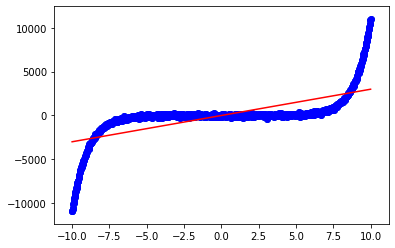

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation

x = np.linspace(-10,10,1000).reshape((-1,1))
y = np.sinh(x) + np.random.normal(0,100,x.shape)

w = np.dot(np.linalg.pinv(adapt(x).T.dot(adapt(x))),adapt(x).T.dot(y))
print("Donc le modèle qu'on trouve est : ",w.T)
plt.scatter(x,y)
#Calcul des prédictions
ypred = predictions(w.T,adapt(x))

#Tracage du modèle : 
plt.scatter(x,y,color="blue")
plt.plot(x,ypred,color = "red")

plt.show()

Epoch 1/100
1000/1000 [==============================] - 0s 70us/step - loss: 539.3333
Epoch 2/100
1000/1000 [==============================] - 0s 12us/step - loss: 497.0117
Epoch 3/100
1000/1000 [==============================] - 0s 11us/step - loss: 457.6137
Epoch 4/100
1000/1000 [==============================] - 0s 9us/step - loss: 417.6405
Epoch 5/100
1000/1000 [==============================] - 0s 12us/step - loss: 377.1570
Epoch 6/100
1000/1000 [==============================] - 0s 11us/step - loss: 336.8860
Epoch 7/100
1000/1000 [==============================] - 0s 9us/step - loss: 297.0072
Epoch 8/100
1000/1000 [==============================] - 0s 13us/step - loss: 261.9278
Epoch 9/100
1000/1000 [==============================] - 0s 9us/step - loss: 232.2955
Epoch 10/100
1000/1000 [==============================] - 0s 11us/step - loss: 209.5575
Epoch 11/100
1000/1000 [==============================] - 0s 13us/step - loss: 192.3627
Epoch 12/100
1000/1000 [====================

1000/1000 [==============================] - 0s 11us/step - loss: 45.3404
Epoch 95/100
1000/1000 [==============================] - 0s 10us/step - loss: 44.4019
Epoch 96/100
1000/1000 [==============================] - 0s 11us/step - loss: 43.8401
Epoch 97/100
1000/1000 [==============================] - 0s 14us/step - loss: 42.8411
Epoch 98/100
1000/1000 [==============================] - 0s 11us/step - loss: 41.9879
Epoch 99/100
1000/1000 [==============================] - 0s 13us/step - loss: 41.1880
Epoch 100/100
1000/1000 [==============================] - 0s 11us/step - loss: 40.9028


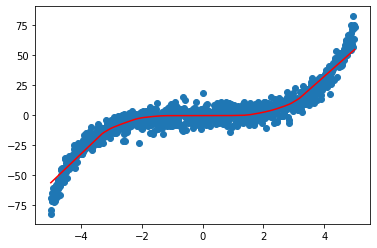

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation

x = np.linspace(-5,5,1000).reshape((-1,1))
y = np.sinh(x) + np.random.normal(0,5,x.shape)

model = Sequential([
    Dense(1, input_shape=(1,)),
    Dense(64,),
    Activation('relu'),
    Dense(64,),
    Activation('relu'),
    Dense(1,),
])
model.compile(optimizer='rmsprop',
              loss='mse')
# Train the model, iterating on the data in batches of 32 samples
model.fit(x, y, epochs=100, batch_size=100)
#Calcul des prédictions
y_pred = model.predict(x)
#Tracage du modèle : 

plt.scatter(x,y)
plt.plot(x,y_pred,color="red")

plt.show()

### Manipuler un multi-couche en flat

In [10]:
def sigmoid(x):
    return 1./(1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

class SimpleNeuralControllerNumpy():
    def __init__(self, n_in, n_out, n_hidden_layers=2, n_neurons_per_hidden=5, params=None):
        self.dim_in = n_in
        self.dim_out = n_out
        if (not params==None):
            if ("n_hidden_layers" in params.keys()):
                n_hidden_layers=params["n_hidden_layers"]
            if ("n_neurons_per_hidden" in params.keys()):
                n_neurons_per_hidden=params["n_neurons_per_hidden"]
        self.n_per_hidden = n_neurons_per_hidden
        self.n_hidden_layers = n_hidden_layers
        self.weights = None 
        self.n_weights = None
        self.init_random_params()
        self.out = np.zeros(n_out)
        #print("Creating a simple mlp with %d inputs, %d outputs, %d hidden layers and %d neurons per layer"%(n_in, n_out,n_hidden_layers, n_neurons_per_hidden))
    def init_random_params(self):
        if(self.n_hidden_layers > 0):
            self.weights = [np.random.random((self.dim_in,self.n_per_hidden))] # In -> first hidden
            self.bias = [np.random.random(self.n_per_hidden)] # In -> first hidden
            for i in range(self.n_hidden_layers-1): # Hidden -> hidden
                self.weights.append(np.random.random((self.n_per_hidden,self.n_per_hidden)))
                self.bias.append(np.random.random(self.n_per_hidden))
            self.weights.append(np.random.random((self.n_per_hidden,self.dim_out))) # -> last hidden -> out
            self.bias.append(np.random.random(self.dim_out))
        else:
            self.weights = [np.random.random((self.dim_in,self.dim_out))] # Single-layer perceptron
            self.bias = [np.random.random(self.dim_out)]
        self.n_weights = np.sum([np.product(w.shape) for w in self.weights]) + np.sum([np.product(b.shape) for b in self.bias])

    def get_parameters(self):
        """
        Returns all network parameters as a single array
        """
        flat_weights = np.hstack([arr.flatten() for arr in (self.weights+self.bias)])
        return flat_weights

    def set_parameters(self, flat_parameters):
        """
        Set all network parameters from a single array
        """
        i = 0 # index
        to_set = []
        self.weights = list()
        self.bias = list()
        if(self.n_hidden_layers > 0):
            # In -> first hidden
            w0 = np.array(flat_parameters[i:(i+self.dim_in*self.n_per_hidden)])
            self.weights.append(w0.reshape(self.dim_in,self.n_per_hidden))
            i += self.dim_in*self.n_per_hidden
            for l in range(self.n_hidden_layers-1): # Hidden -> hidden
                w = np.array(flat_parameters[i:(i+self.n_per_hidden*self.n_per_hidden)])
                self.weights.append(w.reshape((self.n_per_hidden,self.n_per_hidden)))
                i += self.n_per_hidden*self.n_per_hidden
            # -> last hidden -> out
            wN = np.array(flat_parameters[i:(i+self.n_per_hidden*self.dim_out)])
            self.weights.append(wN.reshape((self.n_per_hidden,self.dim_out)))
            i += self.n_per_hidden*self.dim_out
            # Samefor bias now
            # In -> first hidden
            b0 = np.array(flat_parameters[i:(i+self.n_per_hidden)])
            self.bias.append(b0)
            i += self.n_per_hidden
            for l in range(self.n_hidden_layers-1): # Hidden -> hidden
                b = np.array(flat_parameters[i:(i+self.n_per_hidden)])
                self.bias.append(b)
                i += self.n_per_hidden
            # -> last hidden -> out
            bN = np.array(flat_parameters[i:(i+self.dim_out)])
            self.bias.append(bN)
            i += self.dim_out
        else:
            n_w = self.dim_in*self.dim_out
            w = np.array(flat_parameters[:n_w])
            self.weights = [w.reshape((self.dim_in,self.dim_out))]
            self.bias = [np.array(flat_parameters[n_w:])]
        self.n_weights = np.sum([np.product(w.shape) for w in self.weights]) + np.sum([np.product(b.shape) for b in self.bias])
    
    def predict(self,x):
        """
        Propagage
        """
        if(self.n_hidden_layers > 0):
            #Input
            a = np.matmul(x,self.weights[0]) + self.bias[0]
            y = sigmoid(a)
            # hidden -> hidden
            for i in range(1,self.n_hidden_layers-1):
                a = np.matmul(y, self.weights[i]) + self.bias[i]
                y = sigmoid(a)
            # Out
            a = np.matmul(y, self.weights[-1]) + self.bias[-1]
            out = tanh(a)
            return out
        else: # Simple monolayer perceptron
            return tanh(np.matmul(x,self.weights[0]) + self.bias[0])

In [11]:
Network = SimpleNeuralControllerNumpy(10, 1, n_hidden_layers=2, n_neurons_per_hidden=5, params=None)
Network.init_random_params()
print(Network.get_parameters())

[0.58588991 0.94215398 0.0973382  0.28647692 0.6040346  0.85720961
 0.48756501 0.97968176 0.11895695 0.75044592 0.92619201 0.12686916
 0.44130609 0.61527664 0.14002588 0.97526087 0.16352541 0.63003048
 0.10206133 0.93694681 0.12344974 0.57864717 0.64147223 0.46805332
 0.76989191 0.30191317 0.72173251 0.25461905 0.10480063 0.20099123
 0.76825084 0.27889645 0.86481923 0.39009323 0.96038567 0.99799738
 0.93143417 0.06981877 0.89816975 0.02183787 0.42025726 0.66457869
 0.27654593 0.55110163 0.00813506 0.87987162 0.58240741 0.11171913
 0.97966758 0.63257244 0.73012978 0.28536828 0.8987323  0.12644801
 0.72154087 0.16375352 0.26735769 0.8743847  0.21637479 0.42118925
 0.72162671 0.55776963 0.56329708 0.28177777 0.86638948 0.73842774
 0.02065422 0.19651132 0.99509025 0.17891054 0.20848448 0.58130981
 0.55727532 0.40279058 0.89244759 0.85979473 0.84736744 0.06018813
 0.87028888 0.72076546 0.19400585 0.20681395 0.75422555 0.95305587
 0.04577807 0.22364816 0.41655361 0.26064814 0.79747343 0.2842